# INN Hotels Project

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations. 

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics. 

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Importing necessary libraries and data

In [5]:
pip install nb_black

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached nb_black-1.0.7.tar.gz (4.8 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [6]:
# this will help in making the Python code more structured automatically (help adhere to good coding practices)
#
import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV


# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Supervised Learning/INN Hotels Project/INNHotelsGroup.csv')

## Data Overview

- Observations
- Sanity checks

In [9]:
# create a copy in its own cell in case of need to reload the data
df = data.copy()

In [10]:
# view the head, sample, and tail to ensure proper loading
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00000,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68000,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00000,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00000,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50000,0,Canceled


In [11]:
df.sample(5)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
33722,INN33723,2,0,2,1,Meal Plan 2,0,Room_Type 1,96,2017,7,11,Offline,0,0,0,94.50000,0,Not_Canceled
17827,INN17828,2,0,2,5,Not Selected,0,Room_Type 1,256,2018,10,18,Online,0,0,0,83.18000,1,Canceled
30804,INN30805,2,0,0,4,Meal Plan 1,0,Room_Type 1,75,2018,4,5,Online,0,0,0,88.83000,0,Not_Canceled
28177,INN28178,1,0,1,1,Meal Plan 1,0,Room_Type 1,85,2018,12,3,Online,0,0,0,98.00000,0,Not_Canceled
2721,INN02722,2,0,0,2,Meal Plan 1,0,Room_Type 7,5,2018,10,13,Online,0,0,0,215.60000,1,Not_Canceled


In [12]:
df.tail()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80000,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95000,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39000,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50000,0,Canceled
36274,INN36275,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.67000,0,Not_Canceled


Data appears to have loaded properly.  There are several features that will need to be either converted to categorical or one-hot encoded ('meal_plan', 'room_type_reserved', 'market_segment_type').

I will convert 'booking_status' from str to 0 and 1.

The date-related features ('arrival_year', 'arrival_month', 'arrival_date') may need to be converted to datetime data type. 

I will also drop Booking_ID as it is not relevant to the model/problem statement

In [13]:
# check the shape of the DataFrame
df.shape

(36275, 19)

There are 36275 rows and 19 features.

In [14]:
# check the info, looking for non-null counts and data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

All features have 36275 non-null values, so it appears that no data is missing.  

There are 5 object dtypes which will be changed to numerical types before building the Decision Tree.

In [15]:
# double check for null values
df.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

There are no features with null values, there is no missing data.

In [16]:
# Check for Duplicated Rows
df.duplicated().sum()

0

In [17]:
# Check for duplicated Booking_IDs
df['Booking_ID'].duplicated().sum()

0

There is no duplicated data in the DataFrame

Will drop the Booking_ID feature as this alpha-numeric string columns has no relevance to our predictive models.

In [18]:
df=df.drop('Booking_ID', axis=1)
df.head(1)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00000,0,Not_Canceled


Booking ID has been dropped.

In [19]:
# statistical summary of the Data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.00000,1.84496,0.51871,0.00000,2.00000,2.00000,2.00000,4.00000
no_of_children,36275.00000,0.10528,0.40265,0.00000,0.00000,0.00000,0.00000,10.00000
no_of_weekend_nights,36275.00000,0.81072,0.87064,0.00000,0.00000,1.00000,2.00000,7.00000
no_of_week_nights,36275.00000,2.20430,1.41090,0.00000,1.00000,2.00000,3.00000,17.00000
required_car_parking_space,36275.00000,0.03099,0.17328,0.00000,0.00000,0.00000,0.00000,1.00000
lead_time,36275.00000,85.23256,85.93082,0.00000,17.00000,57.00000,126.00000,443.00000
arrival_year,36275.00000,2017.82043,0.38384,2017.00000,2018.00000,2018.00000,2018.00000,2018.00000
arrival_month,36275.00000,7.42365,3.06989,1.00000,5.00000,8.00000,10.00000,12.00000
arrival_date,36275.00000,15.59700,8.74045,1.00000,8.00000,16.00000,23.00000,31.00000
repeated_guest,36275.00000,0.02564,0.15805,0.00000,0.00000,0.00000,0.00000,1.00000


Most features have mean and median relatively close, but there are some that show significant skew.

Most guests had 0 children, 75th %tile is 0, but there is a max of 10.

Min and Max year are 2017 and 2018, respectively, indicating this data is only from those two years.

Most guest had 0 previous cancelations, 75th %tile is 0, but there is a max of 13, so we will look for outliers here. 

**no_of_adults has a min value of 0 which is probably erroneous.**

**avg_price_per_room also has a min value of 0 which is probably erroneous.**

In [20]:
# check the number of 0 adult bookings
df['no_of_adults'].value_counts()

2    26108
1     7695
3     2317
0      139
4       16
Name: no_of_adults, dtype: int64

There are 139 bookings entered with 0 adults. This seems erroneous as an adult is required on the booking for hotels.  Will replace the 0s with 2s, the median, since it is categorical.

In [21]:
df['no_of_adults'] = df['no_of_adults'].replace({0:2})

In [22]:
# check the number of 0 adult bookings
df['no_of_adults'].value_counts()

2    26247
1     7695
3     2317
4       16
Name: no_of_adults, dtype: int64

All 0 adult booking have been replaced with the median, which is 2.

In [23]:
# check number of rows with 0 for the price
df[df['avg_price_per_room']==0].count()

no_of_adults                            545
no_of_children                          545
no_of_weekend_nights                    545
no_of_week_nights                       545
type_of_meal_plan                       545
required_car_parking_space              545
room_type_reserved                      545
lead_time                               545
arrival_year                            545
arrival_month                           545
arrival_date                            545
market_segment_type                     545
repeated_guest                          545
no_of_previous_cancellations            545
no_of_previous_bookings_not_canceled    545
avg_price_per_room                      545
no_of_special_requests                  545
booking_status                          545
dtype: int64

There are 545 bookings with average price of 0.  This is too many to be a mistake.  There may reasonably be some complementary rooms, will check 'market_segment_type' values to see if complemenary is an option.

In [24]:
# value_counts for the market segment options, and how many are labled as 'Complementary'
df['market_segment_type'].value_counts()

Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: market_segment_type, dtype: int64

In [25]:

# how many of the complementary rooms had an avg price of 0
df0 = df[df['market_segment_type']=='Complementary']
df0['avg_price_per_room'].value_counts()

0.00000      354
6.00000        7
2.00000        3
55.00000       2
9.00000        2
65.00000       2
3.00000        2
1.00000        2
20.00000       2
1.60000        1
139.00000      1
35.00000       1
170.00000      1
6.50000        1
42.00000       1
37.33000       1
4.50000        1
75.00000       1
55.50000       1
74.00000       1
70.00000       1
56.00000       1
29.00000       1
79.00000       1
Name: avg_price_per_room, dtype: int64

There were 391 'Complementary' rooms, of which 354 had an average price of 0 euros.  This leaves 191 bookings with a price of 0 that were not labeled 'Complementary', indicating they may be erroneous outliers. Will assess further during outlier analysis/treatment.

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. What are the busiest months in the hotel?
2. Which market segment do most of the guests come from?
3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
4. What percentage of bookings are canceled? 
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

## Univariate Analysis

### Data orientation for reference

In [26]:
# dataframe info to check for data types and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   type_of_meal_plan                     36275 non-null  object 
 5   required_car_parking_space            36275 non-null  int64  
 6   room_type_reserved                    36275 non-null  object 
 7   lead_time                             36275 non-null  int64  
 8   arrival_year                          36275 non-null  int64  
 9   arrival_month                         36275 non-null  int64  
 10  arrival_date                          36275 non-null  int64  
 11  market_segment_

There are 4 Object type columns and 14 numercial.  All columns have 36275 non-null rows, so there are no null values.

In [27]:
# print numeric type column names for reference
num_cols = df.select_dtypes(include=np.number).columns.tolist()
num_cols

['no_of_adults',
 'no_of_children',
 'no_of_weekend_nights',
 'no_of_week_nights',
 'required_car_parking_space',
 'lead_time',
 'arrival_year',
 'arrival_month',
 'arrival_date',
 'repeated_guest',
 'no_of_previous_cancellations',
 'no_of_previous_bookings_not_canceled',
 'avg_price_per_room',
 'no_of_special_requests']

In [28]:
# print object type column names for reference
obj_cols = df.select_dtypes(include='object').columns.tolist()
obj_cols

['type_of_meal_plan',
 'room_type_reserved',
 'market_segment_type',
 'booking_status']

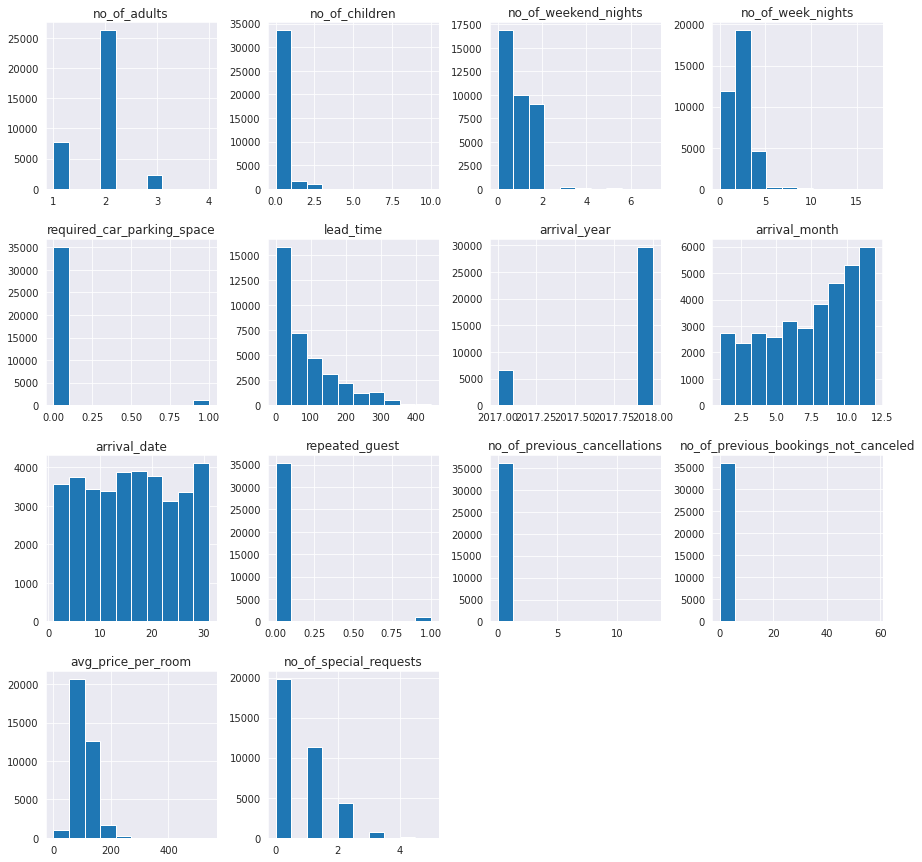

In [29]:
# overview of numerical column distributions to aid in determining which visualization to use
sns.set_style('darkgrid')
df.hist(figsize=(15,15))
plt.show()

will use histogram_boxplot to visualize Lead Time, Average Price, Previous Cancellations, and Previous stays NOT cancelled. The rest of the numerical and all of the categorical columns, I will use labeled_barplot.

### Define Functions to visualize data

In [30]:
# Function for histgram boxplot to assess distributions of numerical features
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [31]:
# function to create labeled barplots for categorical features
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=45, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

The functions are defined properly and ready to be called.

### Lead Time

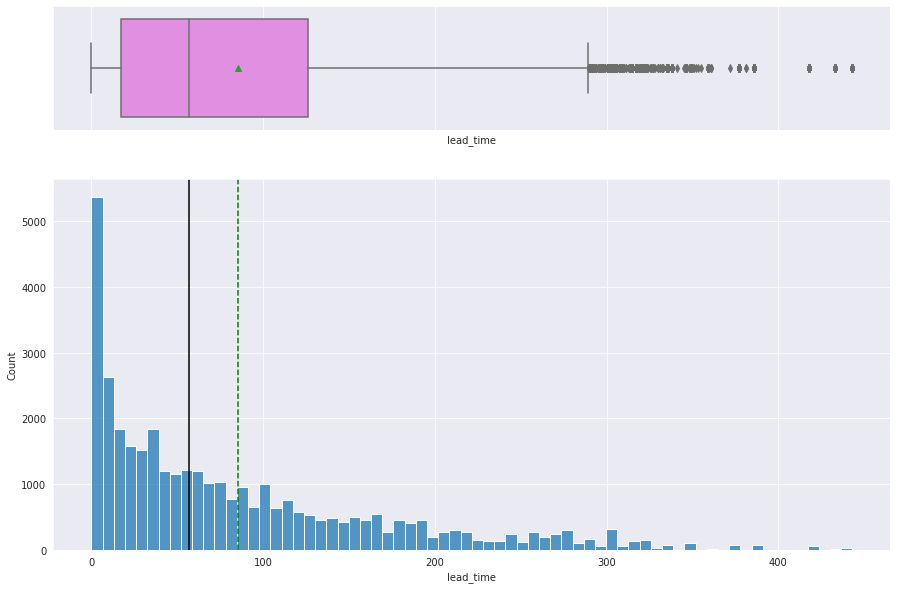

In [32]:
# Visualize Lead Time
histogram_boxplot(df, 'lead_time')

Lead time is extremely right skewed.  The outliers do seem realistic, however, as some people do book hotel rooms greater than a year in advance.

### Average Price

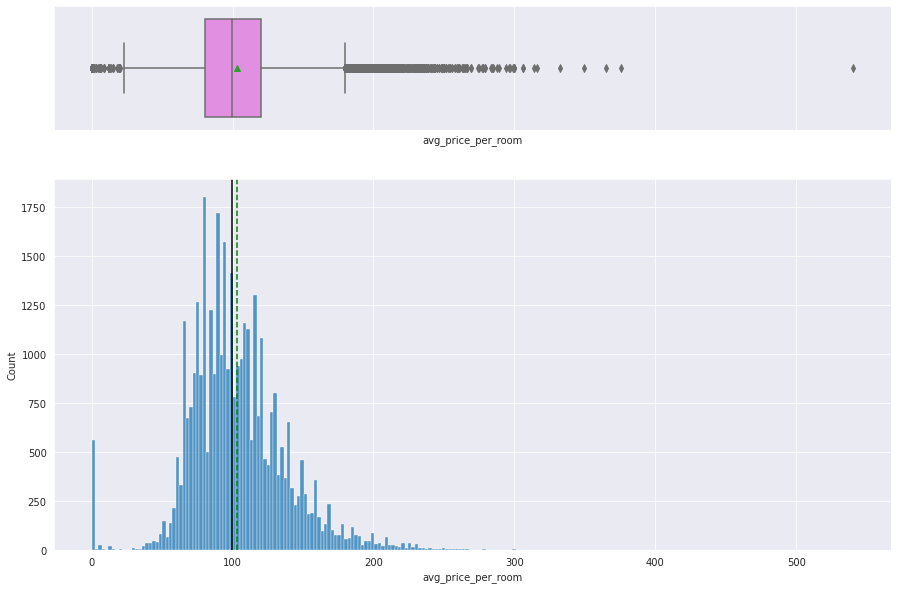

In [33]:
# Visualize average price per room
histogram_boxplot(df, 'avg_price_per_room')

In [34]:
# Calculating the 25th quantile
Q1 = df["avg_price_per_room"].quantile(0.25)

# Calculating the 75th quantile
Q3 = (df['avg_price_per_room'].quantile(0.75)) 

# Calculating IQR
IQR = Q3 - Q1

# Calculating value of upper whisker and lower whisker
Lower_Whisker = Q1 - 1.5 * IQR
Upper_Whisker = Q3 + 1.5 * IQR

print('Lower Whisker:', Lower_Whisker,
      '\nUpper Whisker:', Upper_Whisker,
      '\n25th Quartile:', Q1,
      '\nMedian:', df['avg_price_per_room'].median(),
      '\n75th Quartile', Q3)




Lower Whisker: 20.749999999999993 
Upper Whisker: 179.55 
25th Quartile: 80.3 
Median: 99.45 
75th Quartile 120.0


Average Price is normally distributed with a few far right outliers. 

Mean and Median are very close, however.

**Outlier Analysis**

There are many rooms with average price greater than 180 euros, and a few with prices less than 20 euros.

The outlier prices seem to be legitimate, however. There are hotel rooms with prices between 500 and 600 euros.

### Previous Cancelations

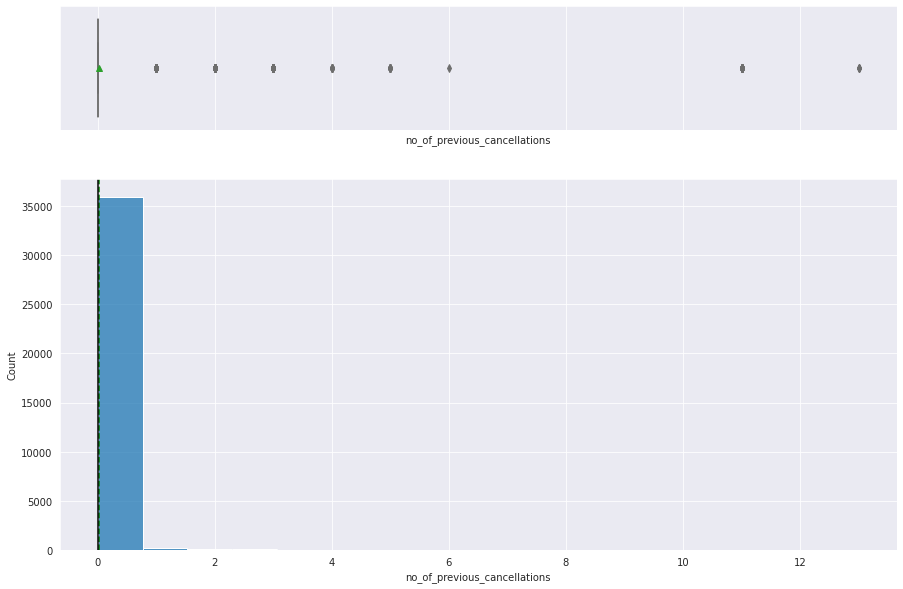

In [35]:
# Visualize Previous Cancellations
histogram_boxplot(df,'no_of_previous_cancellations')

The vast majority of guests had 0 previous cancelations. There are a few outliers, but all numbers appear to be realistic.

### Previous stays NOT canceled.

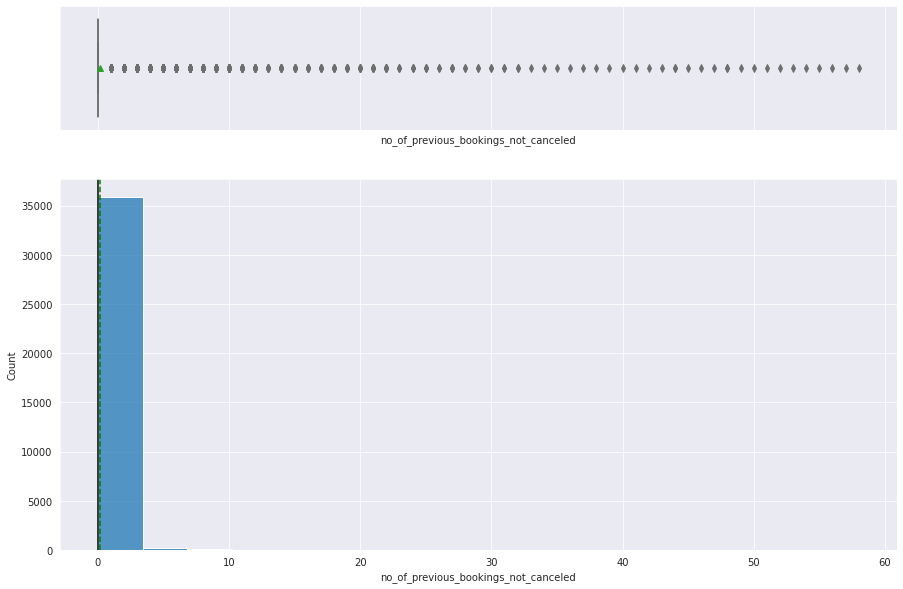

In [36]:
# Visualize previous bookings not canceled
histogram_boxplot(df, 'no_of_previous_bookings_not_canceled')

Most guests had 0 previous stays, but there is a range of outliers.  These numbers are realistic, as some people travel many times in two years for work.

### Number of Adults

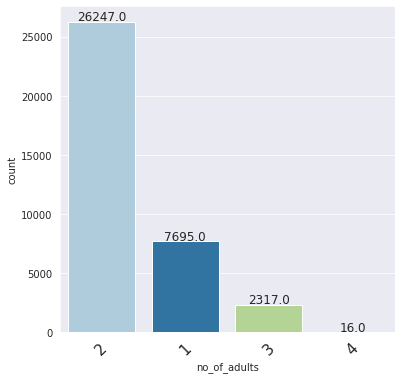

In [37]:
# Visualize  number of adults distribution by booking numbers 
labeled_barplot(df, 'no_of_adults')

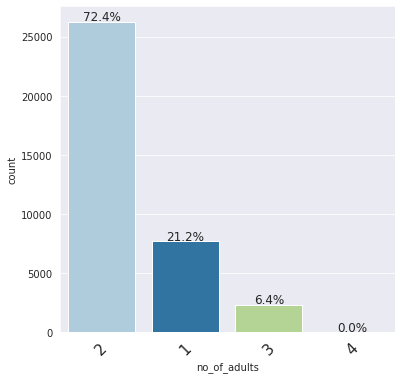

In [38]:
# visualize number of adults distribution by percentage of bookings 
labeled_barplot(df, 'no_of_adults', perc=True)

Most stays, 72% are for two adults. 21% of stays had 1 adult. 



### Number of Children

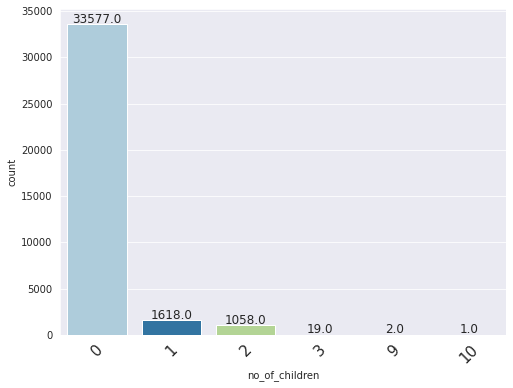

In [39]:
# Visualize number of children distribution
labeled_barplot(df, 'no_of_children')

The vast majority of bookings had 0 children. There is a fair number with one or two children, which seems realistic based on demographics.  There is on with 10 children.

### Number of Weekend

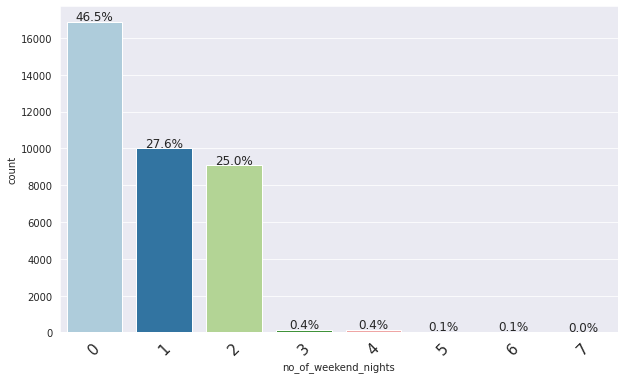

In [40]:
# Visualize distribution of weekend stays
labeled_barplot(df, 'no_of_weekend_nights', perc=True)

The largest category at 46%, were weekday only bookings. There is a small number of bookings with 4, 5, 6, or 7 weekend days, indicating some bookings were for multiple weeks. 

This data set uses weekend stays as Saturday and Sunday bookings.  Assuming this is check-in data, I recommend recoding to Friday and Saturday stays for future analysis.  Friday night and Saturday night are better representatives of Weekend Stays.

### Number of Weeknights

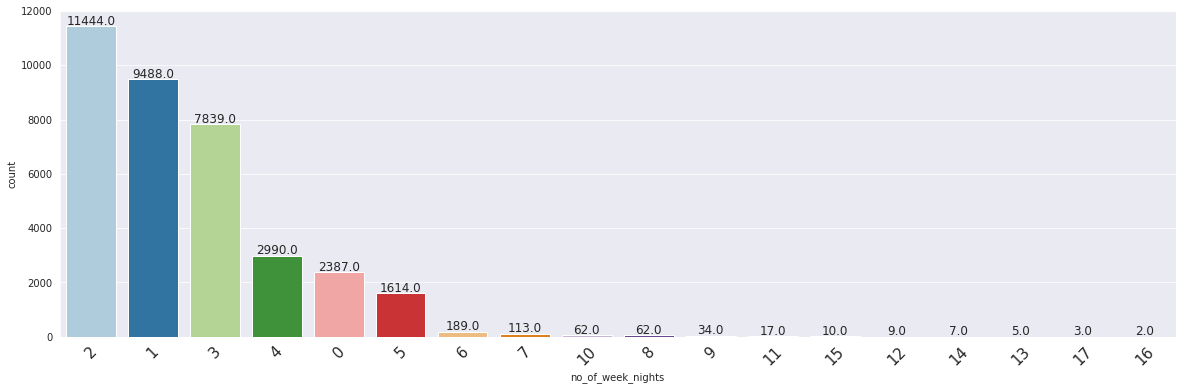

In [41]:
# Visualize the distribution of week night stays
labeled_barplot(df, 'no_of_week_nights')

Most stays are for two days.  There is a right skew, but these are realistic numbers and most likely they are all good data.

### Meal Plan

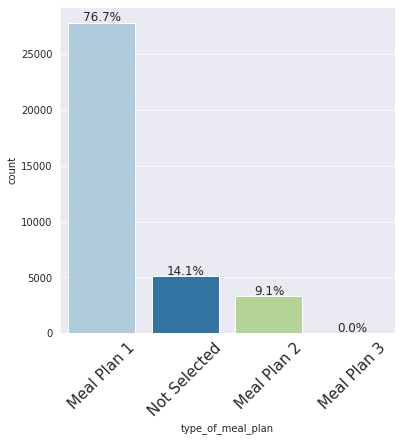

In [42]:
# Visualize the distribution of meal plan selection
labeled_barplot(df, 'type_of_meal_plan', perc=True)

The majority(76%) of bookings had meal plan 1.

### Parking Spaces Required


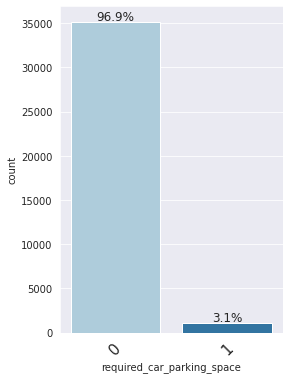

In [43]:
# Visualize the distribtuion of required parking spaces
labeled_barplot(df, 'required_car_parking_space', perc=True)

The vast majority required 0 parking spaces. This is probably an irrelevant feature and will assess further.  Expect to drop this feature.

### Room Type

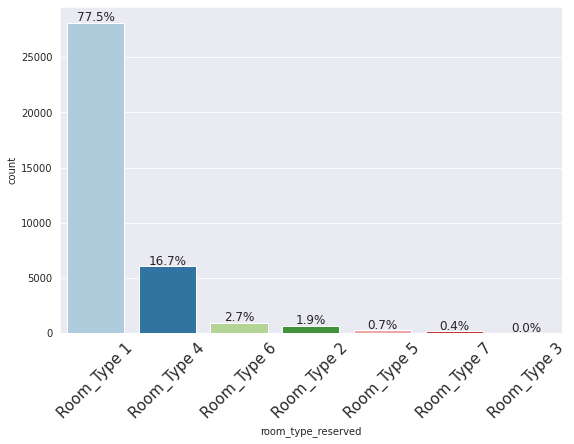

In [44]:
# Visualize the distribution of room types reserved
labeled_barplot(df, 'room_type_reserved', perc=True)

The majority of rooms are type 1, with type 4 as the second most popular.


###Arrival Month

**Question 1: What are the busiest months in the hotel?**


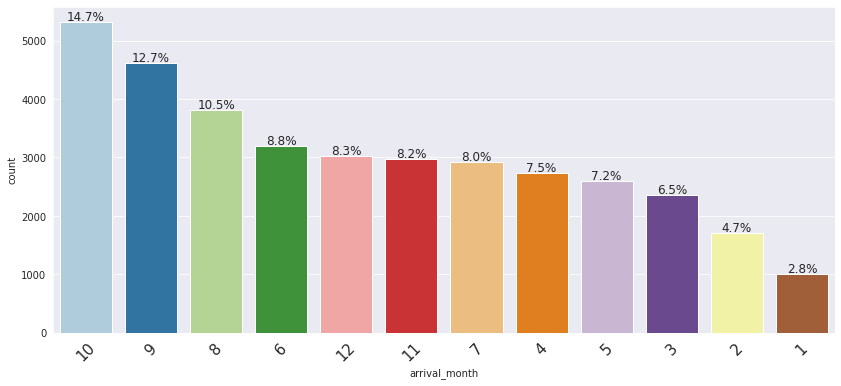

In [45]:
# Visualize the distribution of bookings by arrival month
labeled_barplot(df, 'arrival_month', perc=True)

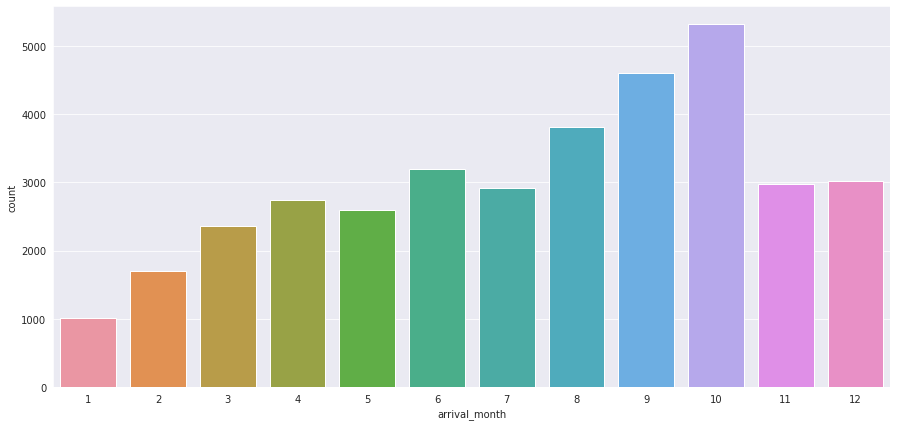

In [46]:
# create a countplot to put the months in order
plt.figure(figsize=(15,7))
sns.countplot(data=df, x='arrival_month');

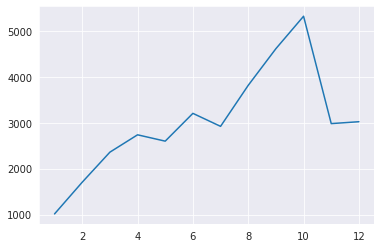

In [47]:
# A lineplot is another way to visualize this inforation
canc_month = df.groupby(['arrival_month'])['booking_status'].count()
canc_month =  pd.DataFrame(canc_month)
canc_month
plt.plot(canc_month);

**Question 1: What are the busiest months in the hotel?**

October, September, and August have the most bookings, with January having the least, probably because it is right after Christmas, so less people are traveling.

### Market Segment Type

**Question 2: Which market segment do most of the guests come from?**

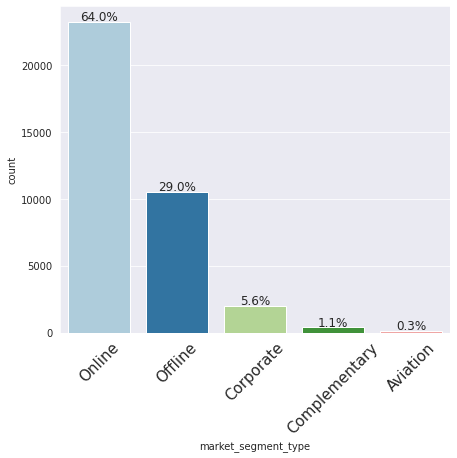

In [48]:
# Visualize the distribution of market segments
labeled_barplot(df,  'market_segment_type', perc=True)

**Question 2: Which market segment do most of the guests come from?**

True to current trends in many industries, the majority of booking were made online.  There is still a fair amount of bookings made offline.  It will be interesting to see how cancelations compare between online and offline.

### Repeat Guests

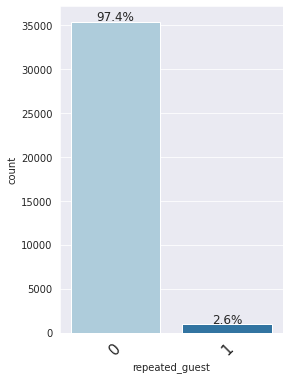

In [49]:
# Visualize the distribution of repeat vs non-repeat guests, 0 is Not repeat guest, 1 is repeat guest
labeled_barplot(df, 'repeated_guest', perc=True)

The vast majority, 97%, were NOT repeat guests.  I assume that the repeat guests may fall mostly in the corporate, avation, and complimentary market segment categories.  Will compare in Bivariate Analysis.

### Number of Special Requests

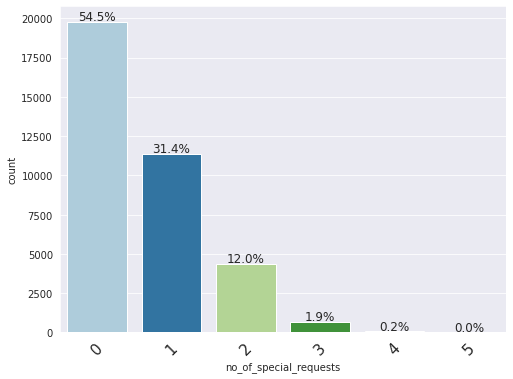

In [50]:
# Visualize the number of special requests
labeled_barplot(df, 'no_of_special_requests', perc=True)

About half of the bookings had zero special requests, another one-third had one special request.

### Booking Status

**Question 4: What percentage of bookings are canceled?**

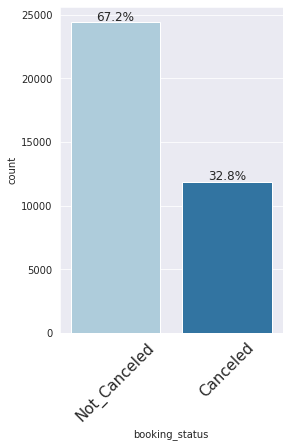

In [51]:
# Visualize the distribution of booking status, canceled or not canceled
labeled_barplot(df, 'booking_status', perc=True)

**Question 4: What percentage of bookings are canceled?**

About 33% of bookings were cancelled.  This is a high number and costly to the hotel industry.

Will now convert booking_status to a numerical feature: NOT cancelled = 0, cancelled = 1.  In other words, if cancelled is 'no', it will be encoded 0, if cancelled is 'yes', will be 1.  This stays true to the fact that we are predicting cancellations, thus a 'Positive' result is a cancellation.  

In [52]:
# encode booking_status with numerical boolean values
df['booking_status'] = df['booking_status'].replace({'Not_Canceled': 0, 'Canceled':1})
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00000,0,0
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68000,1,0
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00000,0,1
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00000,0,1
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50000,0,1


## Bivariate Analysis

###Overall Correlation Check
Numerical Features

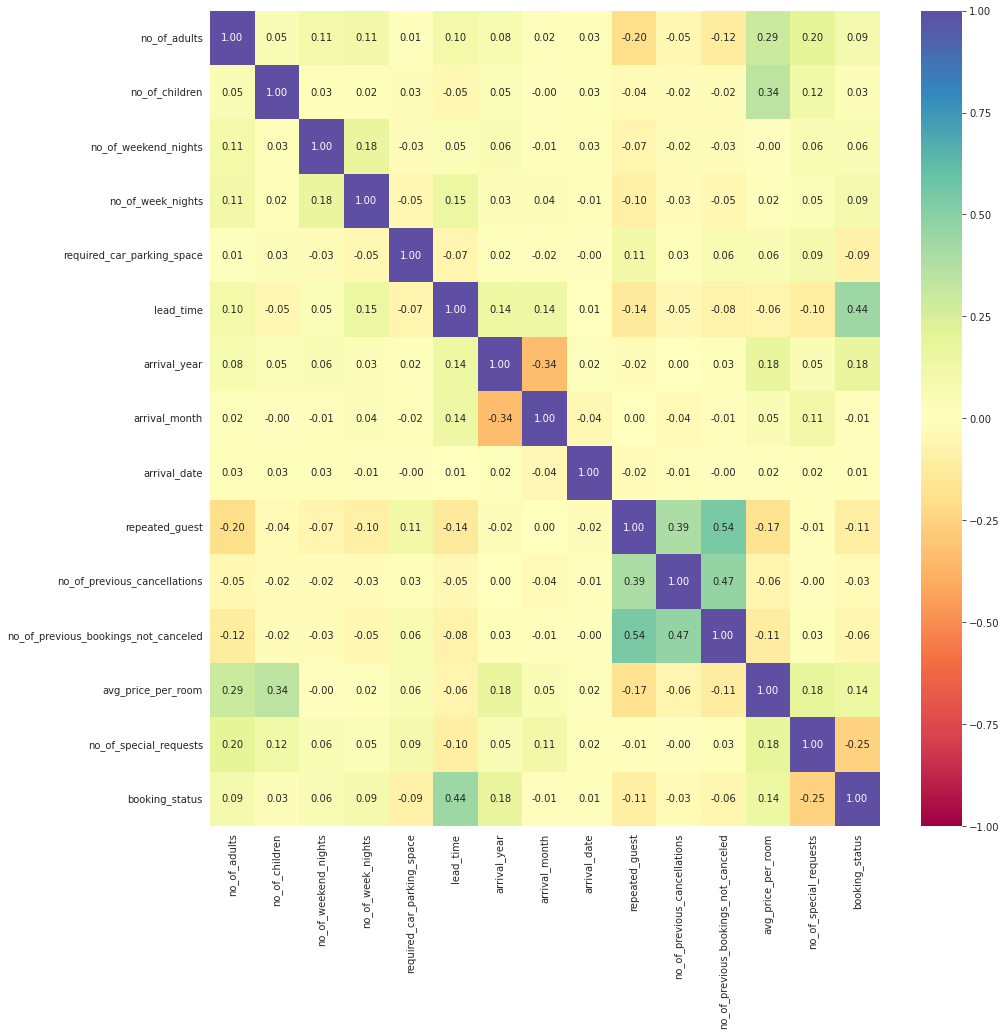

In [53]:
# Visualize the correlation between all numerical features
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

There is very little to no correlation for most features. This is good because it likely means there will be little multicollinearity, which will be relevant for the Logistic Regression Models.

 The only area of some correlation is amongst Repeat Guests, Previous Cancellations, and Previous Bookings Not Cancelled.  This makes sense, as the repeat customers would have more total bookings, and as a guest's total booking increase, the liklihood of having to cancel increases due to multiple stays.

The other area of moderate correlation is Booking Status and Lead Time.  This makes sense since a longer lead time may lead to more chance to cancel if some other life event comes up.  Will have to verify whether longer lead time correlates to a higher liklihood of cancelling, or a lower liklihood of cancelling.

###Define functions to help visualize the data

In [54]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [55]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

Both functions have been properly defined and ready to be called. 

### Rates vs Market Segments
**Question 3: Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?**


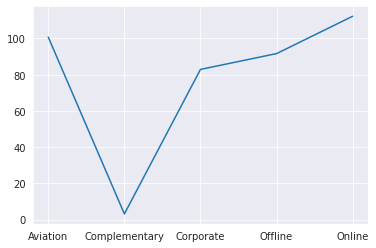

In [56]:
# Calculate the mean price per room by market segment type
rate_mkt = df.groupby(df['market_segment_type'])['avg_price_per_room'].mean()

#plot the means of average price grouped by market segment
plt.plot(rate_mkt);

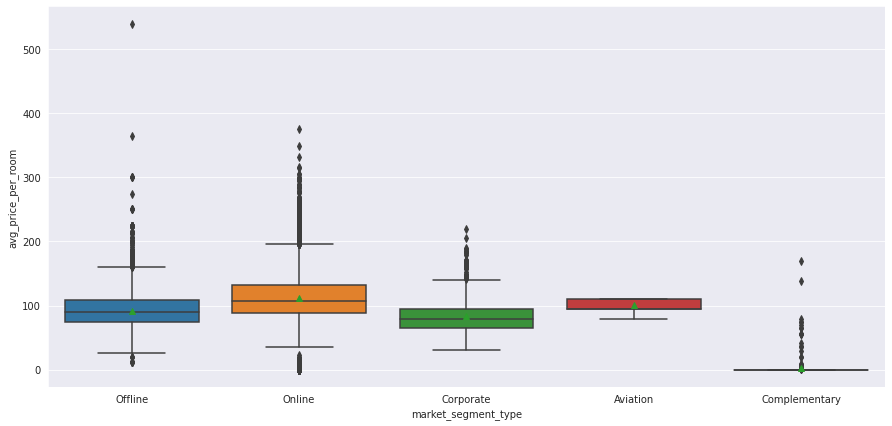

In [57]:
# visualize the distribution with boxplots
plt.figure(figsize=(15,7))
sns.boxplot(data=df, x='market_segment_type', y='avg_price_per_room', showmeans=True);


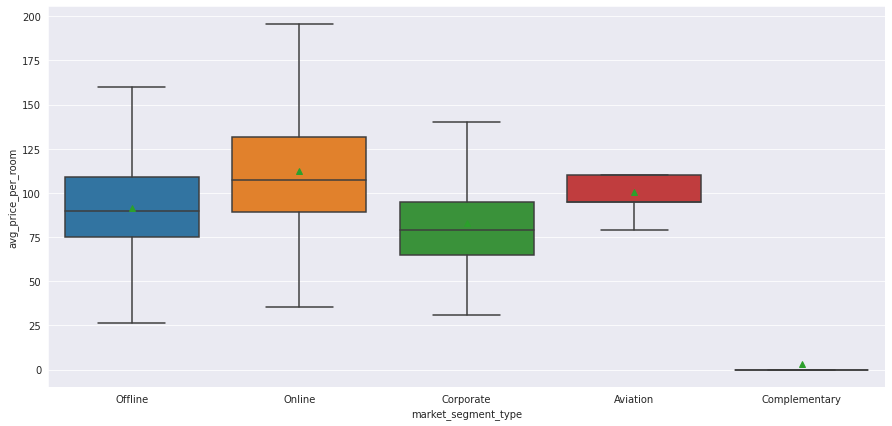

In [58]:
# Visualize with boxplots without outliers for better fidelity of the mean, median, IQR, and Whiskers
plt.figure(figsize=(15,7))
sns.boxplot(data=df, x='market_segment_type', y='avg_price_per_room', showmeans=True, showfliers=False);

In [59]:
# Display the mean price per room by market segment in a dataframe
rate_mkt_df = pd.DataFrame(rate_mkt)
rate_mkt_df

,avg_price_per_room
market_segment_type,
Aviation,100.70400
Complementary,3.14176
Corporate,82.91174
Offline,91.63268
Online,112.25685


Average price per room varies by Market Segment Type, indicating two key points. 

First, Corporate has the lowest rate, Complementary exlcuded, indicating that corporations have a volume discount. I expect there to be more repeat guests from the corporate segment.

Second, online bookings have a higher rate that offline bookings. This indicates that **despite being more expensive, people prefer, and are willing to pay for, the convenience of online booking**, since the vast majority of the bookings were made online. 

### Repeat Guest vs Cancellation
**Question 5: Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?**

booking_status      0      1    All
repeated_guest                     
All             24390  11885  36275
0               23476  11869  35345
1                 914     16    930
------------------------------------------------------------------------------------------------------------------------


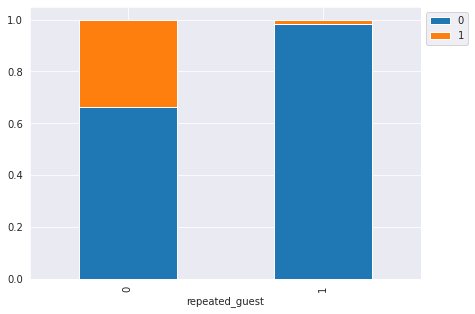

In [60]:
# reapeated guest hued and stacked by booking status
stacked_barplot(df, 'repeated_guest', 'booking_status')

In [61]:
# calculate percentage of repeat guests that cancelled
rep_guest_count =df['repeated_guest'][df['repeated_guest']==1].count()
rep_guest_canc = df['repeated_guest'].loc[(df['repeated_guest']==1) & (df['booking_status']==1)].count()
print(round(rep_guest_canc/rep_guest_count*100,2),'% of repeat guests cancelled their booking', sep='')

1.72% of repeat guests cancelled their booking


In [62]:
# calculate percentage of one-time guests that cancelled
one_time_guest_count =df['repeated_guest'][df['repeated_guest']==0].count()
one_time_guest_canc = df['repeated_guest'].loc[(df['repeated_guest']==0) & (df['booking_status']==1)].count()
print(round(one_time_guest_canc/one_time_guest_count*100,2),'% of repeat guests cancelled their booking', sep='')

33.58% of repeat guests cancelled their booking


**Question 5: Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?**

Actually, repeated guests were LESS likely to cancel than one-time guests. Only **1.7% of repeated guest cancelled**, whereas 33% of one-time guests cancelled.

### Special Requests vs Cancellations

**Question 6: Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?**

booking_status              0      1    All
no_of_special_requests                     
All                     24390  11885  36275
0                       11232   8545  19777
1                        8670   2703  11373
2                        3727    637   4364
3                         675      0    675
4                          78      0     78
5                           8      0      8
------------------------------------------------------------------------------------------------------------------------


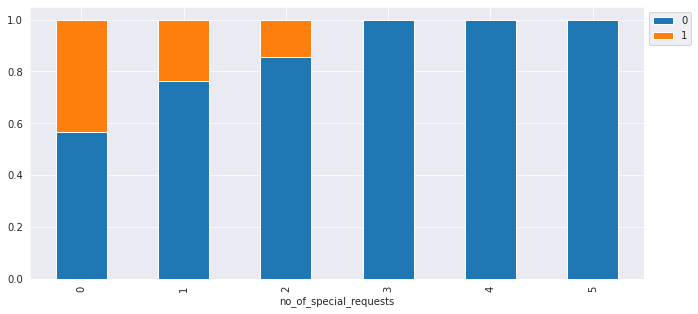

In [63]:
# Visualzie the how number of special requests corresponds to booking status
stacked_barplot(df, 'no_of_special_requests', 'booking_status')

**Question 6: Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?**

Special Requirements DO seem to affect booking status.  There is a correlation suchthat most cancelled bookings had 0 special requirements. Bookings with 3, 4, or 5 special requirements had 0 cancellation.  This suggests that guests with more requirements are less likey to cancel, perhaps because the hotel was able to accomodate their special needs. 

**Does special requirement accomodation affect price?**

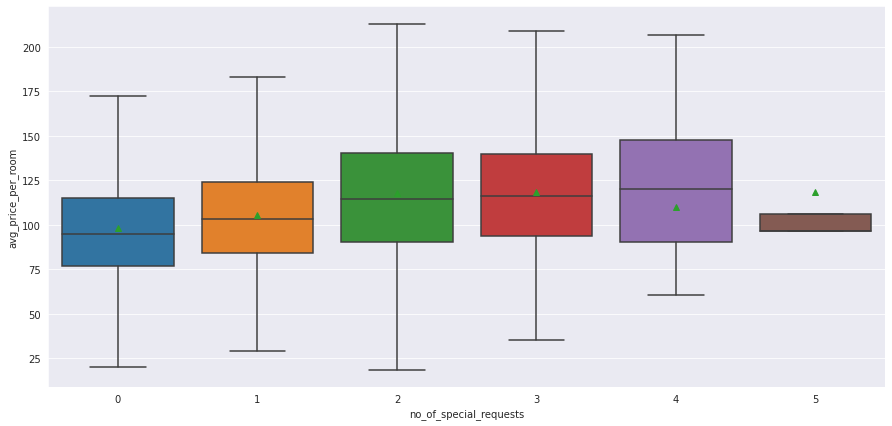

In [64]:
# Visualize special requests vs average price
plt.figure(figsize=(15,7))
sns.boxplot(data=df, x='no_of_special_requests', y='avg_price_per_room', showfliers=False, showmeans=True);

Generally, an increase is special requests corresponds to a slightly higher room cost.

Let's look at how special requests and price affect booking_status

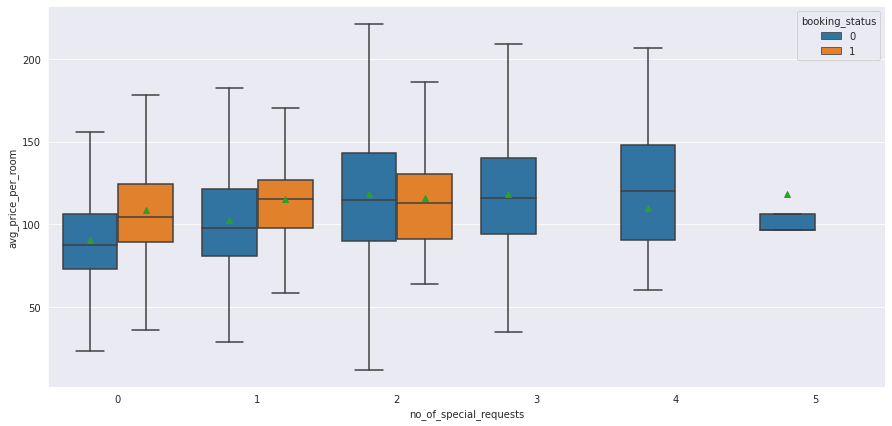

In [65]:
# Visualize special requests vs average price, split by booking_status
plt.figure(figsize=(15,7))
sns.boxplot(data=df, x='no_of_special_requests', y='avg_price_per_room', hue='booking_status',showfliers=False, showmeans=True);

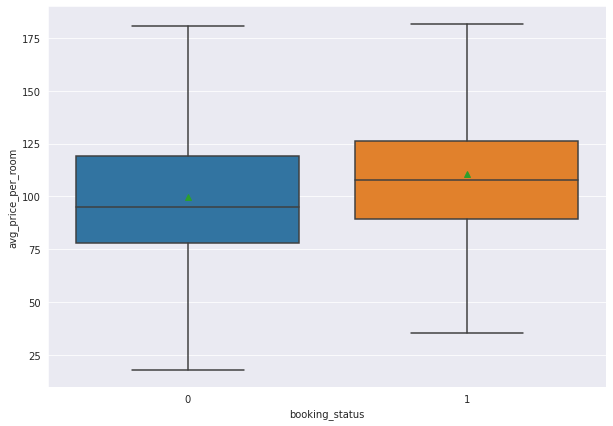

In [66]:
# Visualize average room price by booking status
plt.figure(figsize=(10,7))
sns.boxplot(data=df, x='booking_status', y='avg_price_per_room', showmeans=True, showfliers=False);

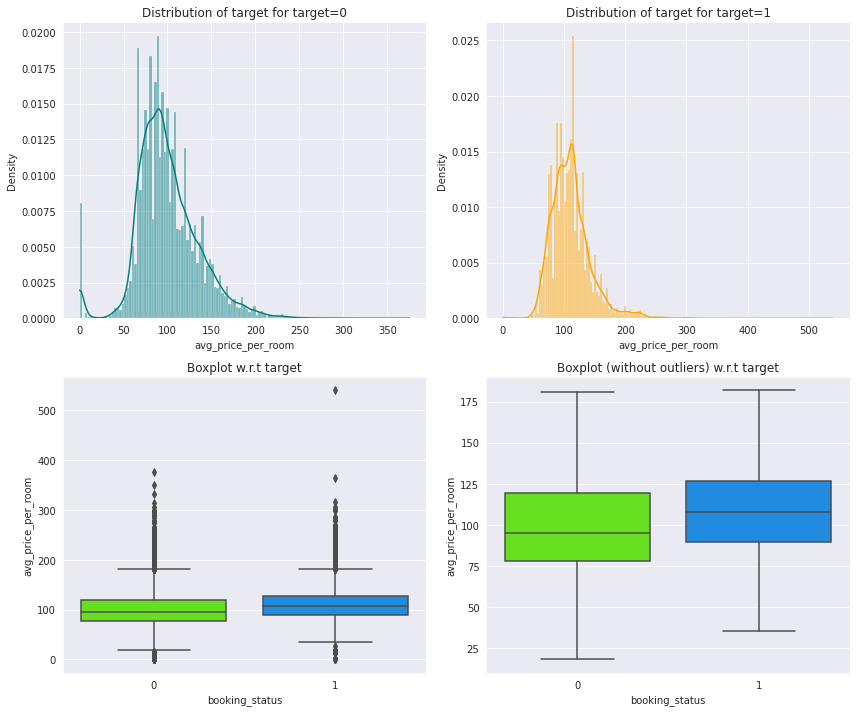

In [67]:
# Visualize the distribution of average room price by booking status
distribution_plot_wrt_target(df, 'avg_price_per_room', 'booking_status')

Average cost is similar between canceled and not canceled bookings. However, canceled bookings did have a slightly higher price.  This could be related to the correlation of online booking having both a higher cancel rate and a higher average price.

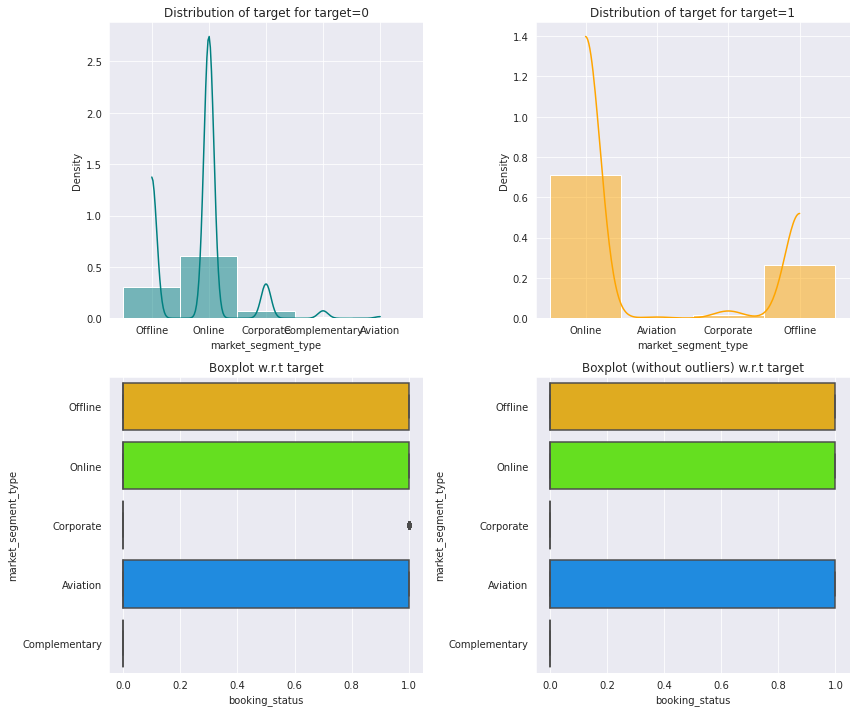

In [68]:
# Visualize market segment broken down by booking status
distribution_plot_wrt_target(df, 'market_segment_type', 'booking_status')

There were more online bookings canceled than there were offline bookings canceled.  However, there were also a lot more online booking overall, than there were offline bookings. Therefore, just looking at the cancelations by market segement overall, does not paint the full picture.

To really understand the cancelations of online vs offline, we need to see the percentage of online bookings canceled vs the percentage of offline bookings canceled.

In [69]:
# calculate the total number of online and offline bookings
online = df[df['market_segment_type']=='Online'].shape[0]
offline = df[df['market_segment_type']=='Offline'].shape[0]

# calculate the number of cancelations for each type, online and offline
canc_online = df[df['market_segment_type']=='Online'][df['booking_status']==1].shape[0]
canc_offline = df[df['market_segment_type']=='Offline'][df['booking_status']==1].shape[0]

# divide the number of online bookings canceled by the total number of online bookings, the same for offline
print('Percent of online bookings canceled: ',round(canc_online/online*100, 2),'%\n',
      'Percent of offline bookings canceled: ', round(canc_offline/offline*100, 2),'%', sep='')

Percent of online bookings canceled: 36.51%
Percent of offline bookings canceled: 29.95%


**Online bookings DO have a larger liklihood of being canceled compared to offline bookings**  

36% of online bookings were canceled, higher than the overall cancelation percentage(33%).

30% of offline bookings were canceled, lower than the overall cancelation percentage(33%).

Online bookings have a higher liklihood of cancelation than the overall average.

Offline have a lower liklihood of cancelation than the overall average. 

In [70]:
 # get info for naming reference and dtype reference
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   type_of_meal_plan                     36275 non-null  object 
 5   required_car_parking_space            36275 non-null  int64  
 6   room_type_reserved                    36275 non-null  object 
 7   lead_time                             36275 non-null  int64  
 8   arrival_year                          36275 non-null  int64  
 9   arrival_month                         36275 non-null  int64  
 10  arrival_date                          36275 non-null  int64  
 11  market_segment_

###How do other independent variables relate to booking status

### Adults vs Booking Status

booking_status      0      1    All
no_of_adults                       
All             24390  11885  36275
2               17084   9163  26247
1                5839   1856   7695
3                1454    863   2317
4                  13      3     16
------------------------------------------------------------------------------------------------------------------------


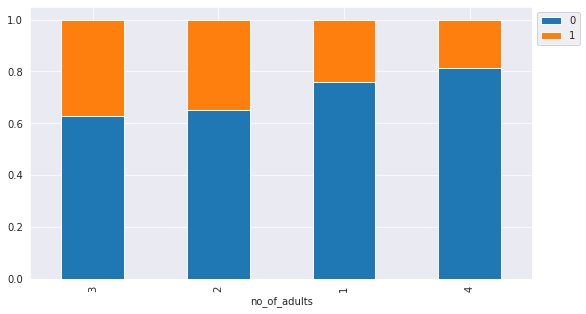

In [71]:
# Visualize booking status by number of adults
stacked_barplot(df, 'no_of_adults', 'booking_status')

All number of adult categories have similar cancelations, with 2 and 3 having higher percentages of cancelations.

booking_status      0      1    All
no_of_children                     
All             24390  11885  36275
0               22695  10882  33577
1                1078    540   1618
2                 601    457   1058
3                  14      5     19
9                   1      1      2
10                  1      0      1
------------------------------------------------------------------------------------------------------------------------


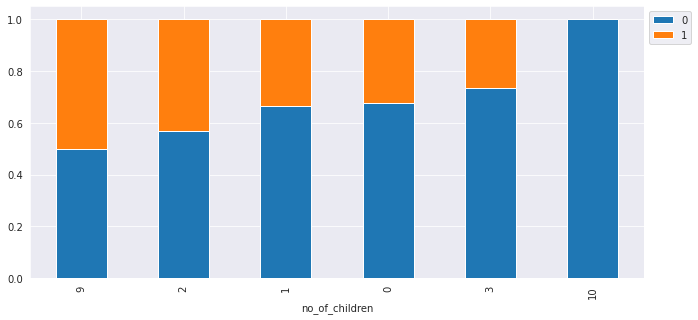

In [72]:
# Visualize booking status by number of children
stacked_barplot(df, 'no_of_children', 'booking_status')

There were only two bookings with 9 children, so a 50% cancelation equates to 1 canceled, 1 not canceled.  This is not a large enough sample of this type to be relevent.  However, 2 children guests had a large number and large percentage of cancellations. 0 and 1 child are about the same cancelation rate, and are slightly higher than the overall cancellation rate for the period. 

### Date Data compared to Booking Status

booking_status      0      1    All
arrival_year                       
All             24390  11885  36275
2018            18837  10924  29761
2017             5553    961   6514
------------------------------------------------------------------------------------------------------------------------


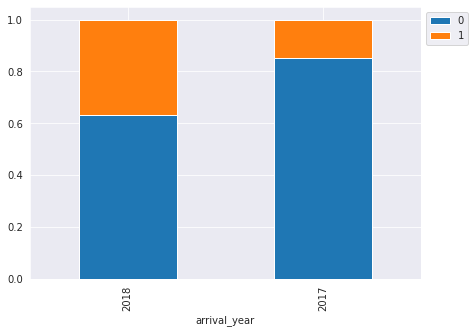

In [73]:
# Visualize comparison booking status by each year, 2017 and 2018
stacked_barplot(df, 'arrival_year', 'booking_status')

There were far more cancelations in 2017 than there was in 2018. Some consideration should be given to the economic situation for Portugal for those two years as possible influencing factors.

We already know that October and September are the busiest months.  

Let's take a look at how cancelations vary by month.

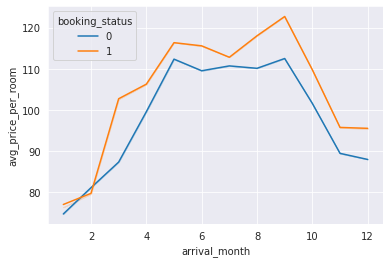

In [74]:
# Visualize booking status by arrival month, 0 = not canceled, 1 = canceled
sns.lineplot(data=df, x='arrival_month', y='avg_price_per_room', hue='booking_status', ci=False);

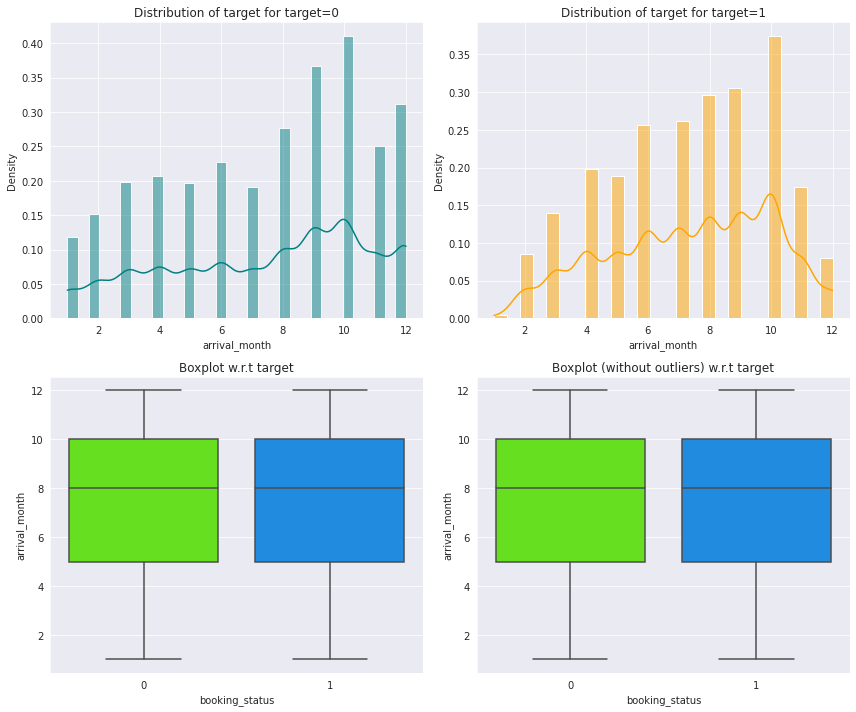

In [75]:
# Visualize distribution of arrival month broken down by booking status, 0=not canceled, 1=canceled
distribution_plot_wrt_target(df, 'arrival_month', 'booking_status')

There are more cancelations during the busy months, which makes sense because there are also more bookings those months. 

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

In [76]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00000,0,0
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68000,1,0
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00000,0,1
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00000,0,1
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50000,0,1


### Check for Outliers and treat as necessary

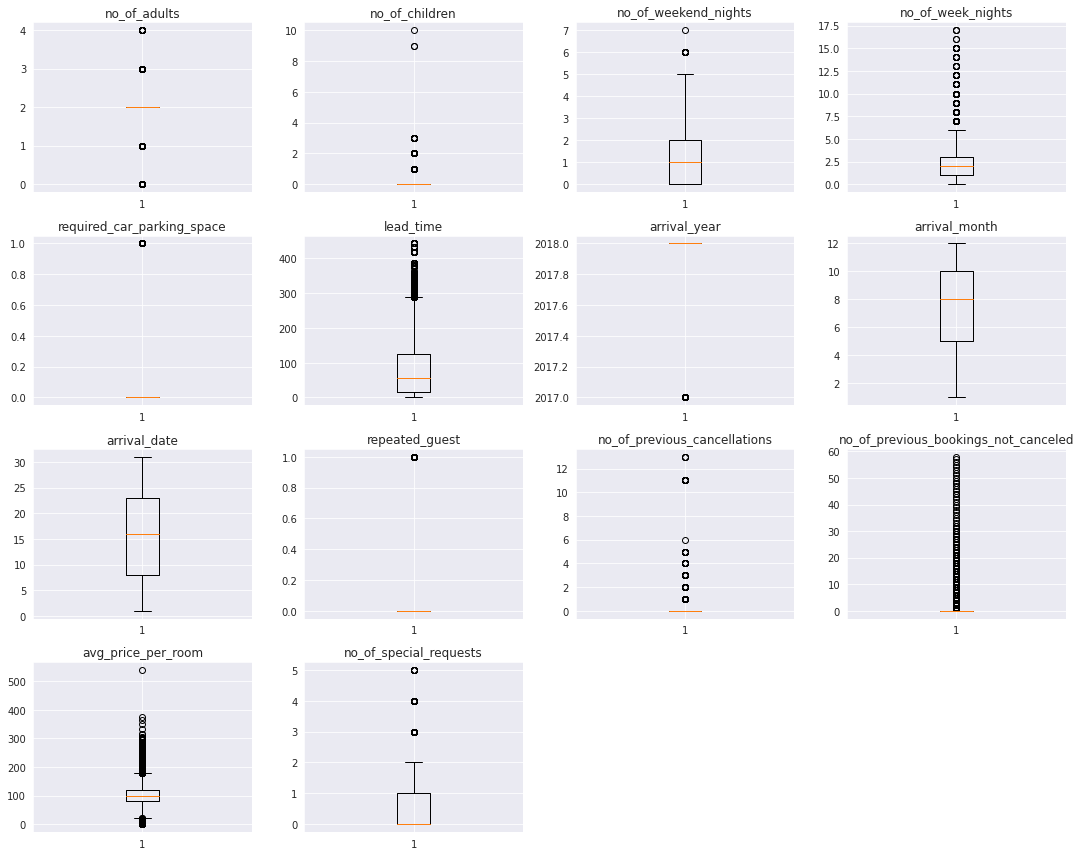

In [77]:
# plot all numerical features with boxplots

numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
# we don't need booking_status as there will be no outliers in a boolean feature
numeric_columns.remove("booking_status")

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

Most features do have values outside of the whiskers (IQR+-1.5), but they all seem to be realistic values.  I will not treat the outliers in this case because they are reasonable values.

### Feature Engineering

- Will drop arrival_date

- Will then split the dependent variable from the independent variables.

- then create dummy variables for all categorical variables 
  - meal_plan, 
  - room_type_reserved, 
  - arrival_year, (do not want year number to artificially add weight)
  - arrival_month, (do not want month number to artificially add weight)
  - market_segment_type
 

In [78]:
# drop arrival_date
df = df.drop('arrival_date', axis=1)

Dropped arrival_date as I do not see relevance in the particular date.  Month and year are, however, relevant.

In [79]:
# separate the dependent (target) variable, 'booking_status' from the independent variables
x= df.drop('booking_status', axis=1)
y = df['booking_status']
print(x.shape, y.shape)

(36275, 16) (36275,)


There are still 36275 rows and 16 independent varialbes. Will add the constant variable and get_dummies for the categorical features in x.

In [80]:
# add a constant variable
x = sm.add_constant(x)
# Get Dummies for the categorical variables then view the head to see how dummy variables were encoded
x = pd.get_dummies(x, drop_first=True)

x.head()

,const,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,1.00000,2,0,1,2,0,224,2017,10,0,0,0,65.00000,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1.00000,2,0,2,3,0,5,2018,11,0,0,0,106.68000,1,0,0,1,0,0,0,0,0,0,0,0,0,1
2,1.00000,1,0,2,1,0,1,2018,2,0,0,0,60.00000,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1.00000,2,0,0,2,0,211,2018,5,0,0,0,100.00000,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,1.00000,2,0,1,1,0,48,2018,4,0,0,0,94.50000,0,0,0,1,0,0,0,0,0,0,0,0,0,1


It looks like all categorical variables were properly encoded. 
The constant was also added.

Next, split training and testing data.

In [81]:
# split into train and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state=1, stratify=y)


In [82]:
# verify shapes of train and test sets and verify stratified ratio of the target variable amongst train and test sets
print("Shape of Training set : ", x_train.shape,'\n')
print("Shape of test set : ", x_test.shape,'\n')
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True),'\n')
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 27) 

Shape of test set :  (10883, 27) 

Percentage of classes in training set:
0   0.67238
1   0.32762
Name: booking_status, dtype: float64 

Percentage of classes in test set:
0   0.67233
1   0.32767
Name: booking_status, dtype: float64


The data split appropriatly into training and testing data with the same ratio of canceled:not canceled between training and testing sets

## EDA

- It is a good idea to explore the data once again after manipulating it.

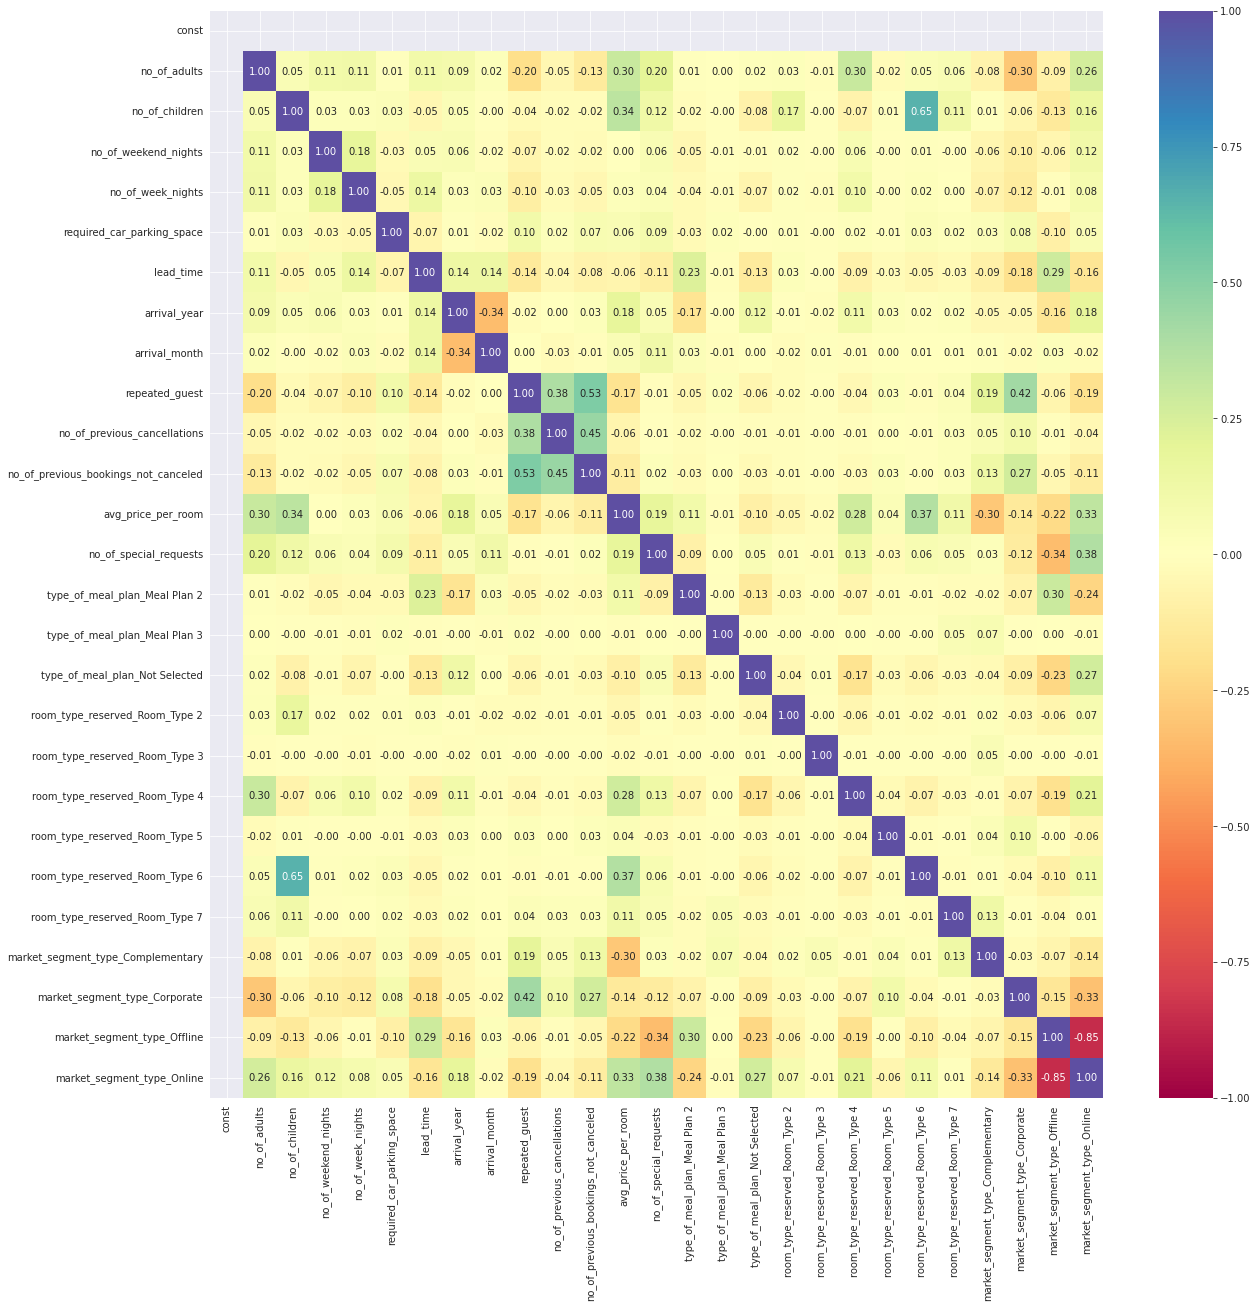

In [83]:
plt.figure(figsize=(20,20))
sns.heatmap(x_train.corr(), vmin=-1, vmax=1, annot=True, fmt='.2f', cmap='Spectral');

In [84]:
# defining a function to plot the confusion_matrix of a classification model


def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

# Logistic Regression Model

## Building a Logistic Regression model

In [85]:
# fitting the model on training set
logit = sm.Logit(y_train, x_train.astype(float))
lg = logit.fit()
print(lg.summary())

         Current function value: 0.422393
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25365
Method:                           MLE   Df Model:                           26
Date:                Mon, 27 Mar 2023   Pseudo R-squ.:                  0.3322
Time:                        02:38:28   Log-Likelihood:                -10725.
converged:                      False   LL-Null:                       -16060.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -887.6165    121.356     -7.314      0.000   -1125.470

In [86]:
# predicting on initial training set
# default threshold is 0.5, if predicted probability is greater than 0.5 the observation will be classified as 1

pred_train = lg.predict(x_train) > 0.5
pred_train = np.round(pred_train)

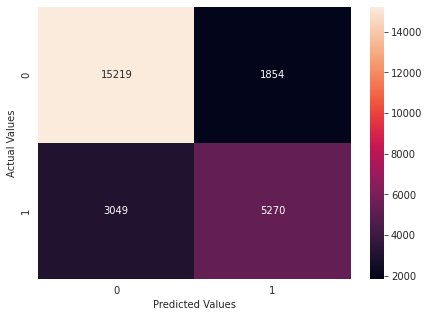

In [87]:
# confusion matrix on initial training set before checking multicollinearity and before dropping high p-values, for reference
cm = confusion_matrix(y_train, pred_train)
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt="g")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

#### The confusion matrix

* True Positives (TP):  A guest canceled and the model predicted guest has canceled.
* True Negatives (TN): A guest did not cancel and the model predicted the guest did not cancel.
* False Positives (FP): The model predicted guest canceled but the guest did not cancel.
* False Negatives (FN): The model predicted guest did not canceld but the guest did cancel.

#### Lets check the accuracy model

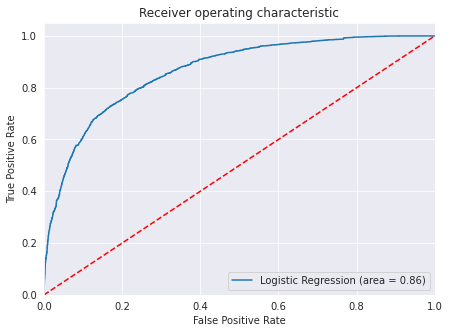

In [88]:
logit_roc_auc_train = roc_auc_score(y_train, lg.predict(x_train))
fpr, tpr, thresholds = roc_curve(y_train, lg.predict(x_train))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

#### define a function for performance metrics

In [89]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

### Performance of inital model

In [90]:
model_performance_classification_statsmodels(lg, x_train, y_train)

,Accuracy,Recall,Precision,F1
0,0.80691,0.63349,0.73975,0.68251


### Checking Multicollinearity

- In order to make statistical inferences from a logistic regression model, it is important to ensure that there is no multicollinearity present in the data.

In [91]:
vif_series1 = pd.Series(
    [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])],
    index=x_train.columns,
)
vif_series1

const                                  39582436.96093
no_of_adults                                  1.33950
no_of_children                                1.98254
no_of_weekend_nights                          1.06630
no_of_week_nights                             1.09384
required_car_parking_space                    1.03473
lead_time                                     1.40220
arrival_year                                  1.43279
arrival_month                                 1.27483
repeated_guest                                1.74989
no_of_previous_cancellations                  1.32187
no_of_previous_bookings_not_canceled          1.57062
avg_price_per_room                            2.02293
no_of_special_requests                        1.24668
type_of_meal_plan_Meal Plan 2                 1.26068
type_of_meal_plan_Meal Plan 3                 1.00797
type_of_meal_plan_Not Selected                1.27960
room_type_reserved_Room_Type 2                1.09669
room_type_reserved_Room_Type

Multicollinearity is low, except for the market_segement_type category.  Usually, one can disregard high VIFs for dummy-variable categorical features, unless all features in that category are high.  

Multicollinearity can make the p-values unreliable.

Technically, one of the features in market segment is below 5, but it is pretty close to 5, at 4.34. The other features of this category are very high. 

I will drop all market segment type features, then refit the model.

In [92]:
# drop all market_segment_type features and save into x_train1
unwanted = x_train.columns[x_train.columns.str.startswith('market')]
x_train1 = x_train.drop(unwanted, axis=1)

In [93]:
# check VIFs after dropping market_segment features
vif_series2 = pd.Series(
    [variance_inflation_factor(x_train1.values, i) for i in range(x_train1.shape[1])],
    index=x_train1.columns,
)
vif_series2

const                                  39159302.05443
no_of_adults                                  1.28139
no_of_children                                1.97515
no_of_weekend_nights                          1.05340
no_of_week_nights                             1.08442
required_car_parking_space                    1.02976
lead_time                                     1.33259
arrival_year                                  1.41781
arrival_month                                 1.26629
repeated_guest                                1.55913
no_of_previous_cancellations                  1.30718
no_of_previous_bookings_not_canceled          1.55669
avg_price_per_room                            1.66359
no_of_special_requests                        1.13055
type_of_meal_plan_Meal Plan 2                 1.19204
type_of_meal_plan_Meal Plan 3                 1.00442
type_of_meal_plan_Not Selected                1.15417
room_type_reserved_Room_Type 2                1.08570
room_type_reserved_Room_Type

Multicollinearity has been removed, now re-run the model and assess p-values

In [94]:
# fitting the model on training set
logit1 = sm.Logit(y_train, x_train1.astype(float))
lg1 = logit1.fit(maxiter=100)
print(lg1.summary())

Optimization terminated successfully.
         Current function value: 0.448502
         Iterations 16
                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25369
Method:                           MLE   Df Model:                           22
Date:                Mon, 27 Mar 2023   Pseudo R-squ.:                  0.2909
Time:                        02:38:31   Log-Likelihood:                -11388.
converged:                       True   LL-Null:                       -16060.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                -1178.9916    118.

## Model performance evaluation

In [95]:
# predicting on training set after removing multicollinearity
# default threshold is 0.5, if predicted probability is greater than 0.5 the observation will be classified as 1

pred_train = lg1.predict(x_train1) > 0.5
pred_train = np.round(pred_train)

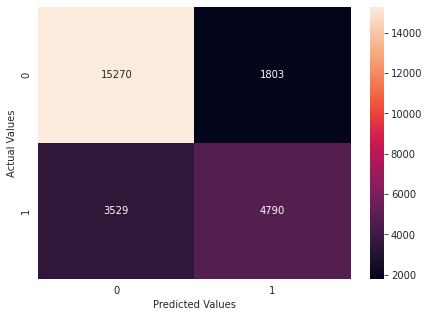

In [96]:
cm = confusion_matrix(y_train, pred_train)
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt="g")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

#### The confusion matrix

* True Positives (TP):  A guest canceled and the model predicted guest has canceled.
* True Negatives (TN): A guest did not cancel and the model predicted the guest did not cancel.
* False Positives (FP): The model predicted guest canceled but the guest did not cancel.
* False Negatives (FN): The model predicted guest did not canceld but the guest did cancel.

#### Lets check the accuracy model

In [97]:
model_performance_classification_statsmodels(lg1, x_train1, y_train)

,Accuracy,Recall,Precision,F1
0,0.79001,0.57579,0.72653,0.64244


Accuracy, Recall, Precision, and F1 are still pretty close to where they were before dropping the features with multicollinearity.

Now, I will check the ROC curve of this model before assessing p-values.

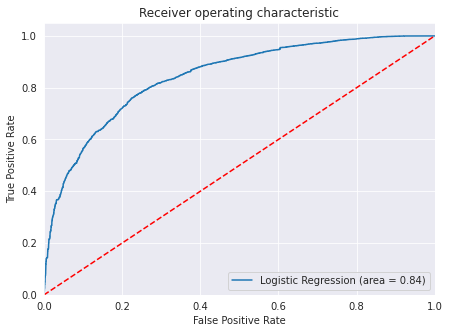

In [98]:
logit_roc_auc_train = roc_auc_score(y_train, lg1.predict(x_train1))
fpr, tpr, thresholds = roc_curve(y_train, lg1.predict(x_train1))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

The ROC curve still looks good, there is a large AUC.

Now I will drop high p-values, then re-assess all performance metrics and choose a threshold.

In [99]:
print(lg1.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25369
Method:                           MLE   Df Model:                           22
Date:                Mon, 27 Mar 2023   Pseudo R-squ.:                  0.2909
Time:                        02:38:31   Log-Likelihood:                -11388.
converged:                       True   LL-Null:                       -16060.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                -1178.9916    118.419     -9.956      0.000   -1411.089    -946.895
no_of_adults                             0.1166      

will drop room_type_reserved_Room_Type 2 because it has the highest p-value and it is >0.05.

In [100]:
# drop the feature with the highest p-value >0.05
x_train2 = x_train1.drop('room_type_reserved_Room_Type 2', axis=1)

In [101]:
# fit the model with the updated independent variables
# fitting the model on training set
logit2 = sm.Logit(y_train, x_train2.astype(float))
lg2 = logit2.fit()
print(lg2.summary())

Optimization terminated successfully.
         Current function value: 0.448506
         Iterations 16
                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25370
Method:                           MLE   Df Model:                           21
Date:                Mon, 27 Mar 2023   Pseudo R-squ.:                  0.2909
Time:                        02:38:32   Log-Likelihood:                -11388.
converged:                       True   LL-Null:                       -16060.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                -1178.9224    118.

In [102]:
# check performance metrics after dropping high p-value
model_performance_classification_statsmodels(lg2, x_train2, y_train)

,Accuracy,Recall,Precision,F1
0,0.78970,0.57519,0.72599,0.64185


Not much change to performance.

Will drop the next highest p-value >0.05 and retrain the model

In [103]:
x_train3 = x_train2.drop('room_type_reserved_Room_Type 4', axis=1)

logit3 = sm.Logit(y_train, x_train3)
lg3 = logit3.fit()
print(lg3.summary())

Optimization terminated successfully.
         Current function value: 0.448511
         Iterations 16
                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25371
Method:                           MLE   Df Model:                           20
Date:                Mon, 27 Mar 2023   Pseudo R-squ.:                  0.2909
Time:                        02:38:32   Log-Likelihood:                -11389.
converged:                       True   LL-Null:                       -16060.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                -1181.3883    118.

In [104]:
# check performance metrics after dropping high p-value
model_performance_classification_statsmodels(lg3, x_train3, y_train)

,Accuracy,Recall,Precision,F1
0,0.78974,0.57531,0.72603,0.64194


Not much change to performance.

Will drop the next highest p-value >0.05 and retrain the model

In [105]:
x_train4 = x_train3.drop('type_of_meal_plan_Meal Plan 3', axis=1)

logit4 = sm.Logit(y_train, x_train4)
lg4 = logit4.fit()
print(lg4.summary())

Optimization terminated successfully.
         Current function value: 0.448526
         Iterations 16
                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25372
Method:                           MLE   Df Model:                           19
Date:                Mon, 27 Mar 2023   Pseudo R-squ.:                  0.2908
Time:                        02:38:33   Log-Likelihood:                -11389.
converged:                       True   LL-Null:                       -16060.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                -1179.0740    118.

In [106]:
# check performance metrics after dropping high p-value
model_performance_classification_statsmodels(lg4, x_train4, y_train)

,Accuracy,Recall,Precision,F1
0,0.78974,0.57543,0.72596,0.64199


Not much change to performance.

Will drop the next highest p-value >0.05 and retrain the model

In [107]:
x_train5 = x_train4.drop('room_type_reserved_Room_Type 3', axis=1)

logit5 = sm.Logit(y_train, x_train5)
lg5 = logit5.fit()
print(lg5.summary())

Optimization terminated successfully.
         Current function value: 0.448540
         Iterations 16
                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25373
Method:                           MLE   Df Model:                           18
Date:                Mon, 27 Mar 2023   Pseudo R-squ.:                  0.2908
Time:                        02:38:33   Log-Likelihood:                -11389.
converged:                       True   LL-Null:                       -16060.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                -1178.5897    118.

In [108]:
# check performance metrics after dropping high p-value
model_performance_classification_statsmodels(lg5, x_train5, y_train)

,Accuracy,Recall,Precision,F1
0,0.78970,0.57531,0.72592,0.64190


Not much change to performance.

Will drop the next highest p-value >0.05 and retrain the model

In [109]:
x_train6 = x_train5.drop('no_of_previous_bookings_not_canceled', axis=1)

logit6 = sm.Logit(y_train, x_train6)
lg6 = logit6.fit()
print(lg6.summary())

Optimization terminated successfully.
         Current function value: 0.448723
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25374
Method:                           MLE   Df Model:                           17
Date:                Mon, 27 Mar 2023   Pseudo R-squ.:                  0.2905
Time:                        02:38:34   Log-Likelihood:                -11394.
converged:                       True   LL-Null:                       -16060.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                          -1172.5714    118.260     -9.915    

All remaining p-values are very low.  This is a good model for the training data.  I will assess the performance and ROC curve, then apply the model to the test data.

In [110]:
# check performance metrics after dropping high p-value
model_performance_classification_statsmodels(lg6, x_train6, y_train)

,Accuracy,Recall,Precision,F1
0,0.78974,0.57555,0.72589,0.64204


There is no change to the performance metrics.  Now I will asses the ROC-AUC, then apply to test data.

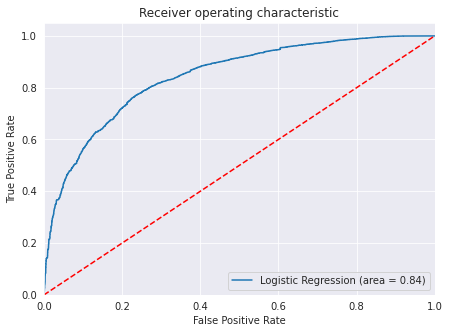

In [111]:
logit_roc_auc_train = roc_auc_score(y_train, lg6.predict(x_train6))
fpr, tpr, thresholds = roc_curve(y_train, lg6.predict(x_train6))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

In [112]:
# drop the variables from the test set theat were dropped from the training set
x_test6 = x_test[list(x_train6.columns)]
x_test6.shape

(10883, 18)

In [113]:
pred_test = lg6.predict(x_test6) > 0.5
pred_test = np.round(pred_test)

In [114]:
print("Accuracy on training set:") 
model_performance_classification_statsmodels(lg6, x_train6, y_train)


Accuracy on training set:


,Accuracy,Recall,Precision,F1
0,0.78974,0.57555,0.72589,0.64204


In [115]:
print("Accuracy on test set:") 
model_performance_classification_statsmodels(lg6, x_test6, y_test)

Accuracy on test set:


,Accuracy,Recall,Precision,F1
0,0.78646,0.56955,0.72021,0.63608


In [116]:
# predicting on training set after removing multicollinearity
# default threshold is 0.5, if predicted probability is greater than 0.5 the observation will be classified as 1

pred_test = lg6.predict(x_test6) > 0.5
pred_test = np.round(pred_test)

Checking model performance on Test set

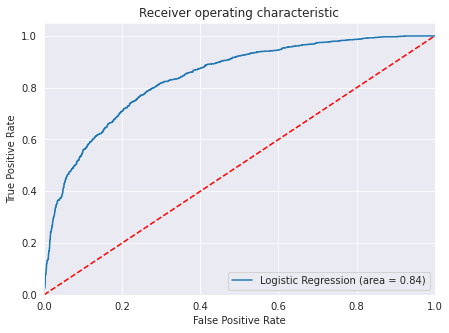

In [117]:
logit_roc_auc_test = roc_auc_score(y_test, lg6.predict(x_test6))
fpr, tpr, thresholds = roc_curve(y_test, lg6.predict(x_test6))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

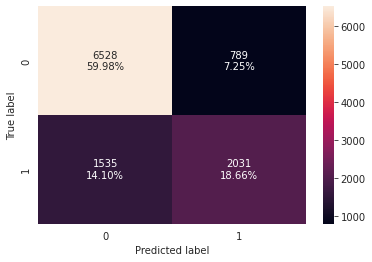

In [118]:
confusion_matrix_statsmodels(
    lg6, x_test6, y_test
)

The performance on training data is very close to the training on the test data, the model is not overfitting.

Now, I will try to optimize the model by assing ROC-AUC and optimizing the threshold.

In [119]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg6.predict(x_train6))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.3182255313000993


Checking this optimal threshold on training data

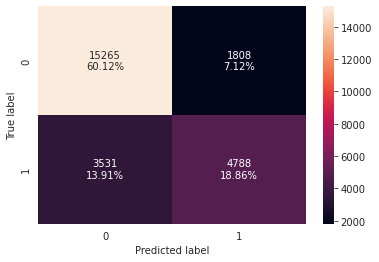

In [120]:
# creating confusion matrix with the DEFAULT threshold(0.5) for comparison
confusion_matrix_statsmodels(
    lg6, x_train6, y_train
)

In [121]:
# Accuracy on the training set with the DEFAULT threshold for comparison
print("Accuracy on training set:") 
model_performance_classification_statsmodels(lg6, x_train6, y_train)

Accuracy on training set:


,Accuracy,Recall,Precision,F1
0,0.78974,0.57555,0.72589,0.64204


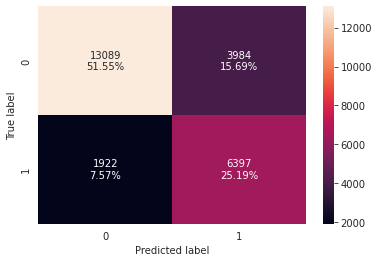

In [122]:
# creating confusion matrix on the training set based on the ROC-AUC optimized threshold
confusion_matrix_statsmodels(
    lg6, x_train6, y_train, threshold=optimal_threshold_auc_roc
)

In [123]:
# Accuracy on training set using the ROC-AUC optimized threshold
print("Accuracy on training set:") 
model_performance_classification_statsmodels(lg6, x_train6, y_train, threshold=optimal_threshold_auc_roc)


Accuracy on training set:


,Accuracy,Recall,Precision,F1
0,0.76741,0.76896,0.61622,0.68417


By adjusting the threshold to the optimum value based on the ROC curve, the TP has increased a lot, the FP has also increased.  FN decreased, TN also decreased.  This is a better threshold to predict more of the guests who will cancel.  

will now check on Test Set

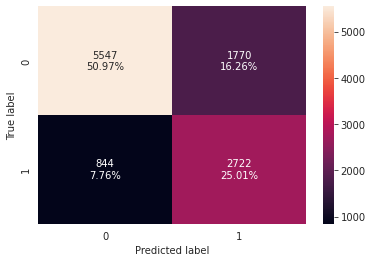

In [124]:
# creating confusion matrix on the test set based on the ROC-AUC optimized threshold
confusion_matrix_statsmodels(
    lg6, x_test6, y_test, threshold=optimal_threshold_auc_roc
)

In [125]:
# Accuracy on testing set using the ROC-AUC optimized threshold
print("Accuracy on testing set:") 
model_performance_classification_statsmodels(lg6, x_test6, y_test, threshold=optimal_threshold_auc_roc)

Accuracy on testing set:


,Accuracy,Recall,Precision,F1
0,0.75981,0.76332,0.60597,0.67560


On the test set, the ROC-AUC optimized threshold also increases the TP and FP and reduces the FNs.

Precision and Recall are similar on the training and testing set, this model is not over-fitting.

### Precision-Recall Curve

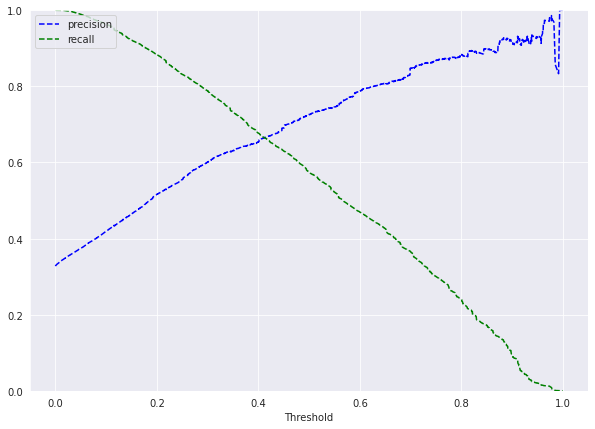

In [126]:
y_scores = lg6.predict(x_train6)
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

* At the threshold of 0.41, we get balanced recall and precision.

In [127]:
# setting the threshold
optimal_threshold_curve = 0.41

**Checking model performance on training set**

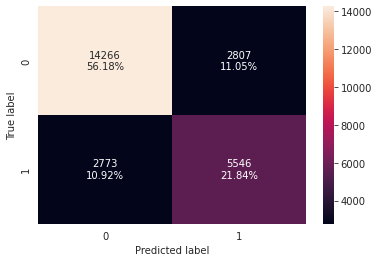

In [128]:
# creating confusion matrix on the training set based on the curve optimized threshold
confusion_matrix_statsmodels(
    lg6, x_train6, y_train, threshold=optimal_threshold_curve
)

In [129]:
# Accuracy on training set using the ROC-AUC optimized threshold
print("Accuracy on training set:") 
model_performance_classification_statsmodels(lg6, x_train6, y_train, threshold=optimal_threshold_curve)

Accuracy on training set:


,Accuracy,Recall,Precision,F1
0,0.78025,0.66667,0.66395,0.66531


Using the CURVE optimized threshold, we captured more of the TP than the default, but less than the ROC-AUC optimized threshold.

**Check the Curve optimized threshold on the Test Set**

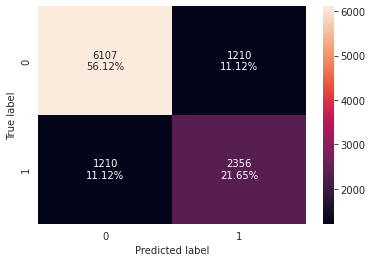

In [130]:
# creating confusion matrix on the test set based on the curve optimized threshold
confusion_matrix_statsmodels(
    lg6, x_test6, y_test, threshold=optimal_threshold_curve)

In [131]:
# Accuracy on testing set using the ROC-AUC optimized threshold
print("Accuracy on testing set:") 
model_performance_classification_statsmodels(lg6, x_test6, y_test, threshold=optimal_threshold_curve)

Accuracy on testing set:


,Accuracy,Recall,Precision,F1
0,0.77763,0.66068,0.66068,0.66068


On test data, the curve optimized threshold predicted more TP than the default, but less than the ROC-AUC optimized threshold.

## Final Model Summary

**Converting coefficients to odds**

* The coefficients ($\beta$s) of the logistic regression model are in terms of $log(odds)$ and to find the odds, we have to take the exponential of the coefficients
* Therefore, **$odds =  exp(\beta)$**
* The percentage change in odds is given as $(exp(\beta) - 1) * 100$

In [132]:
# converting coefficients to odds
odds = np.exp(lg6.params)

# finding the percentage change
perc_change_odds = (np.exp(lg6.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=x_train6.columns).T

,const,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,repeated_guest,no_of_previous_cancellations,avg_price_per_room,no_of_special_requests,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7
Odds,0.00000,1.13038,1.25388,1.22101,1.06090,0.24776,1.01386,1.78448,0.94974,0.06887,1.27904,1.02294,0.30614,0.69467,2.12305,0.43552,0.37296,0.18553
Change_odd%,-100.00000,13.03830,25.38806,22.10145,6.09032,-75.22402,1.38636,78.44845,-5.02593,-93.11296,27.90402,2.29418,-69.38564,-30.53337,112.30501,-56.44785,-62.70399,-81.44663


**Most impactful Coefficient interpretations**

*Assume all other factors held constant to interpret odds affected by changing one variable*
- `repeated_guest`: a repeat guest **decreases** the odds of canceling by 93%.
- `previous cancelations`: a one unit increase in number of previous cancelations **increases** the odds of canceling by 28%.
- `special requests`: a one unit increase of no_of_special_requests **decreases** the odds of canceling by 69%.
- `meal plan NOT selected`: a guest not selecting a meal plan **increases** the odds of canceling by 112%.
- `meal plan 2`: selection meal plan 2 **decreases** the odds of cancellation by 30%.
- `required parking spaces`: a one unit increase in required car parking space **decreases** the odds of cancelling by 75%
- `number of children`: Each additional child **increases** the odds by 25%.
- `room type 5`: **decreases** odds of cancelling by 56%.
- `room type 6`: **decreases** odds of cancelling by 62%.
- `room type 7`: **decreased** odds of cancelling by 81%.

The optimized Logistic Regression models have a Recall of 66%, which is not great.  Let's see if a Decision Tree can do better. 

# Decision Tree

## Building a Decision Tree model

Will start with x_train since there is no need to drop multicollinearity problems.

I will drop the 'constant' column as it is not required for Decision Trees.

In [133]:
# drop const from x_train and x_test and from feature_names
x_train = x_train.drop('const', axis=1)
x_test = x_test.drop('const', axis=1)


In [134]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=1)

There is no need to visualize this inital tree, it is far to complex

In [135]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dTree.feature_importances_, columns = ["Imp"], index = x_train.columns).sort_values(by = 'Imp', ascending = False))

                                         Imp
lead_time                            0.37945
avg_price_per_room                   0.19181
arrival_month                        0.07669
market_segment_type_Online           0.07481
no_of_special_requests               0.07206
no_of_week_nights                    0.05503
no_of_adults                         0.03833
no_of_weekend_nights                 0.03787
arrival_year                         0.01617
market_segment_type_Offline          0.01356
room_type_reserved_Room_Type 4       0.01094
type_of_meal_plan_Not Selected       0.00718
required_car_parking_space           0.00714
type_of_meal_plan_Meal Plan 2        0.00652
no_of_children                       0.00578
room_type_reserved_Room_Type 2       0.00201
market_segment_type_Corporate        0.00185
room_type_reserved_Room_Type 5       0.00123
room_type_reserved_Room_Type 6       0.00101
room_type_reserved_Room_Type 7       0.00022
repeated_guest                       0.00020
no_of_prev

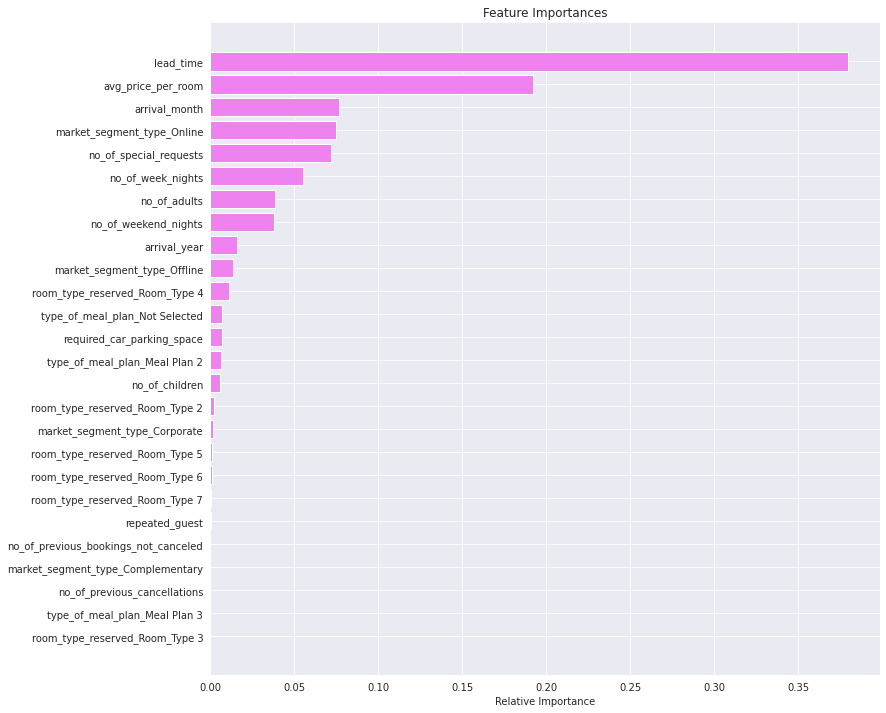

In [136]:
# visualize feature importances
feature_names = list(x_train.columns)
importances = dTree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Lead time and Average Price per room are the most important features in this initial decision tree. 

There are many features with little-to-no importance to the tree. Through pruning, I expect many of these to be removed from the model.

## Scoring our initial Decision Tree

### Define functions to aid in scoring

In [137]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [138]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))


    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### initial tree performance on training data

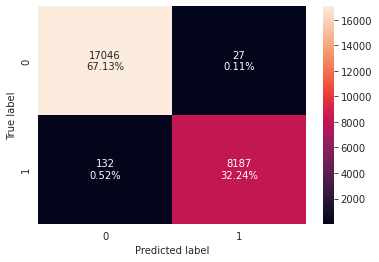

In [139]:
confusion_matrix_sklearn(dTree, x_train, y_train)

In [140]:
# check performance metrics of the unpruned tree on training data
dTree_init_train = model_performance_classification_sklearn(dTree, x_train, y_train)
dTree_init_train

,Accuracy,Recall,Precision,F1
0,0.99374,0.98413,0.99671,0.99038


### initial tree performance on testing data

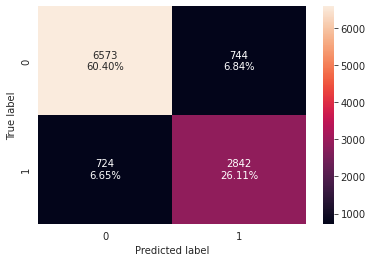

In [141]:
confusion_matrix_sklearn(dTree,x_test, y_test)

In [142]:
# check the performance metrics of the unpruned tree on testing data
dTree_init_test = model_performance_classification_sklearn(dTree, x_test, y_test)
dTree_init_test

,Accuracy,Recall,Precision,F1
0,0.86511,0.79697,0.79253,0.79474


This fully involved, unpruned decision tree performs close to 100% on training data as expected, it was allowed to include all noise and make all the splits it can.

The test set score of 86% is not too bad, but we want the train and test scores to be closer to ensure we're not overfit on the training data

**What does the hotel want?**
minimize
- two types of loss
  - actual loss, they book a room that is canceled, refunded, and unable to re-book
  - opportunity loss, a guest does not book due to cancelation policies

**Guest canceling with a refund is a greater loss risk**
This is what we want to capture accurately

**Recall** is the better metric. Higher recall will reduce False Negatives

  **Recall** - The ratio of True Positives to Actual Positives (tp + fn)

In this case, it is OK to have some false negatives since it will mean predicting more of the guests that will cancel.  

In this case, we are not necessarily refusing service to a guest predicted to cancel, instead, we can use this model to shape the cancelation policy with regards to lead time to cancel prior to stay and refunds. 

## Decision Tree (with class_weights)

* If the frequency of class A is 10% and the frequency of class B is 90%, then class B will become the dominant class and the decision tree will become biased toward the dominant classes

* In this case, we will set class_weight = "balanced", which will automatically adjust the weights to be inversely proportional to the class frequencies in the input data

* class_weight is a hyperparameter for the decision tree classifier

In [143]:
dTree_wt = DecisionTreeClassifier(random_state=1, class_weight="balanced")
dTree_wt.fit(x_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=1)

#### Performance of weighted tree on training data

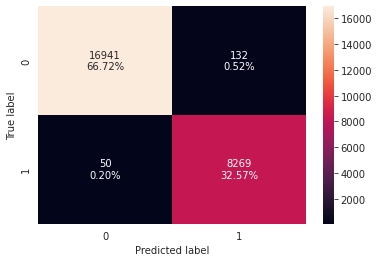

In [144]:
confusion_matrix_sklearn(dTree_wt, x_train, y_train)

In [145]:
dTree_wt_train = model_performance_classification_sklearn(
    dTree_wt, x_train, y_train
)
dTree_wt_train

,Accuracy,Recall,Precision,F1
0,0.99283,0.99399,0.98429,0.98911


### performance of weighted tree on test data

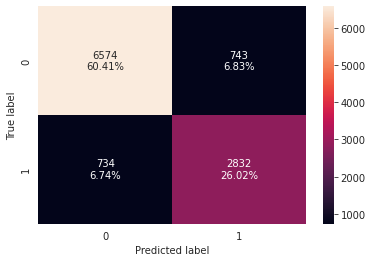

In [146]:
confusion_matrix_sklearn(dTree_wt, x_test, y_test)

In [147]:
dTree_wt_test = model_performance_classification_sklearn(
    dTree_wt, x_test, y_test
)
dTree_wt_test

,Accuracy,Recall,Precision,F1
0,0.86428,0.79417,0.79217,0.79317


* There is a huge disparity in performance of model on training set and test set, which suggests that the model is overfiiting.

**Let's use pruning techniques to try and reduce overfitting.**

## Do we need to prune the tree?

We do need to prune the tree.  While the performance on testing data is not too bad, in general, there is a huge disparity between the performance on training and testing data. This indicates the initial model and auto-balanced-weighted model are both overfitting the data.   

### Pre-pruning

**Using GridSearch for Hyperparameter tuning of our tree model**

* Hyperparameter tuning is also tricky in the sense that there is no direct way to calculate how a change in the
  hyperparameter value will reduce the loss of your model, so we usually resort to experimentation. i.e we'll use Grid search
* Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters. 
* It is an exhaustive search that is performed on a the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

In [148]:
# Choose the type of classifier.
dTree_pre = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "class_weight": [None, "balanced"],
    "max_depth": np.arange(2, 7, 1),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
    'min_impurity_decrease': [0.001,0.01,0.1]
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(dTree_pre, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters
dTree_pre = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dTree_pre.fit(x_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=2, max_leaf_nodes=50,
                       min_impurity_decrease=0.001, min_samples_split=10,
                       random_state=1)

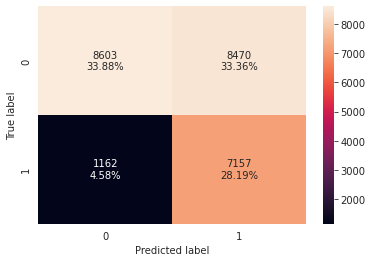

In [149]:
confusion_matrix_sklearn(dTree_pre,x_train, y_train)

In [150]:
# check the performance metrics of the hyperparameter tuned tree on training data
dTree_pre_train = model_performance_classification_sklearn(dTree_pre, x_train, y_train)
dTree_pre_train

,Accuracy,Recall,Precision,F1
0,0.62067,0.86032,0.45799,0.59776


After tuning hyperparameters, the model appears to be much more generalized on the training data.  Will check this model on test data, next.

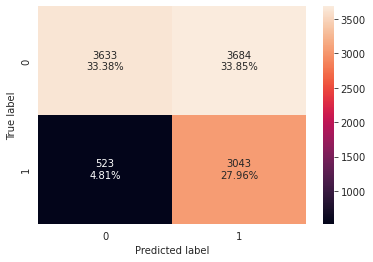

In [151]:
confusion_matrix_sklearn(dTree_pre, x_test, y_test)

In [152]:
# check the performance metrics of the hyperparameter tuned tree on testing data
dTree_pre_test = model_performance_classification_sklearn(dTree_pre, x_test, y_test)
dTree_pre_test

,Accuracy,Recall,Precision,F1
0,0.61343,0.85334,0.45236,0.59128


The pre-pruned model performed much better on the test data with an improved Recall score over the initial model and the weighted model.  Overall accuracy decreased, that is ok, Recall is the better metric for this case.

Let's take a look at the new tree and it's feature importance.

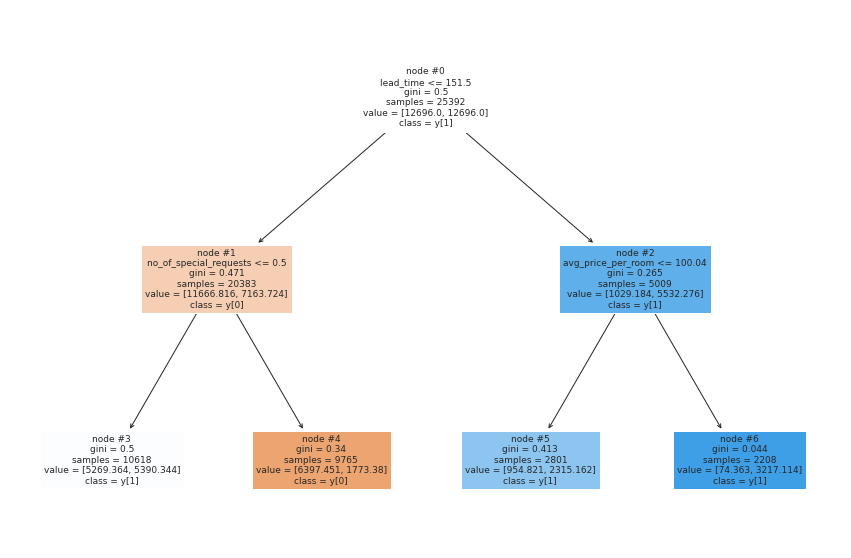

In [153]:
plt.figure(figsize=(15,10))

tree.plot_tree(dTree_pre,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

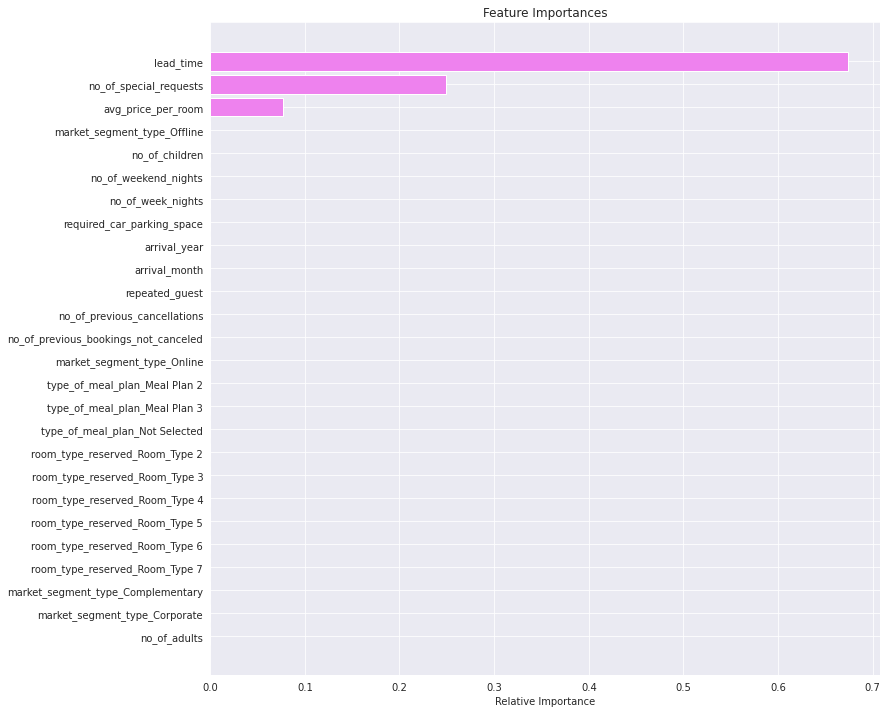

In [154]:
# visualize feature importances
importances = dTree_pre.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Lead time is still the most important factor in cancelations.

In [155]:
# Text report showing the rules of a decision tree -

print(tree.export_text(dTree_pre, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- weights: [5269.36, 5390.34] class: 1
|   |--- no_of_special_requests >  0.50
|   |   |--- weights: [6397.45, 1773.38] class: 0
|--- lead_time >  151.50
|   |--- avg_price_per_room <= 100.04
|   |   |--- weights: [954.82, 2315.16] class: 1
|   |--- avg_price_per_room >  100.04
|   |   |--- weights: [74.36, 3217.11] class: 1



### Post Pruning

The `DecisionTreeClassifier` provides parameters such as
``min_samples_leaf`` and ``max_depth`` to prevent a tree from overfiting. Cost
complexity pruning provides another option to control the size of a tree. In
`DecisionTreeClassifier`, this pruning technique is parameterized by the
cost complexity parameter, ``ccp_alpha``. Greater values of ``ccp_alpha``
increase the number of nodes pruned. Here we only show the effect of
``ccp_alpha`` on regularizing the trees and how to choose a ``ccp_alpha``
based on validation scores.

**Total impurity of leaves vs effective alphas of pruned tree**

Minimal cost complexity pruning recursively finds the node with the "weakest
link". The weakest link is characterized by an effective alpha, where the
nodes with the smallest effective alpha are pruned first. To get an idea of
what values of ``ccp_alpha`` could be appropriate, scikit-learn provides
`DecisionTreeClassifier.cost_complexity_pruning_path` that returns the
effective alphas and the corresponding total leaf impurities at each step of
the pruning process. As alpha increases, more of the tree is pruned, which
increases the total impurity of its leaves.

In [156]:
clf = DecisionTreeClassifier(random_state=1, class_weight="balanced")
path = clf.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

In [157]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.00000,0.00912
1,-0.00000,0.00912
2,0.00000,0.00912
3,0.00000,0.00912
4,0.00000,0.00912
...,...,...
1748,0.00938,0.32791
1749,0.00941,0.33732
1750,0.01253,0.34985
1751,0.03405,0.41794


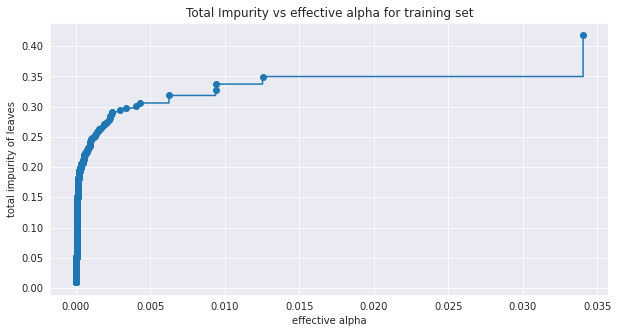

In [158]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using the effective alphas. The last value
in ``ccp_alphas`` is the alpha value that prunes the whole tree,
leaving the tree, ``clfs[-1]``, with one node.

In [159]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced"
    )
    clf.fit(x_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.08205938055990314


For the remainder, we remove the last element in
``clfs`` and ``ccp_alphas``, because it is the trivial tree with only one
node. Here we show that the number of nodes and tree depth decreases as alpha
increases.

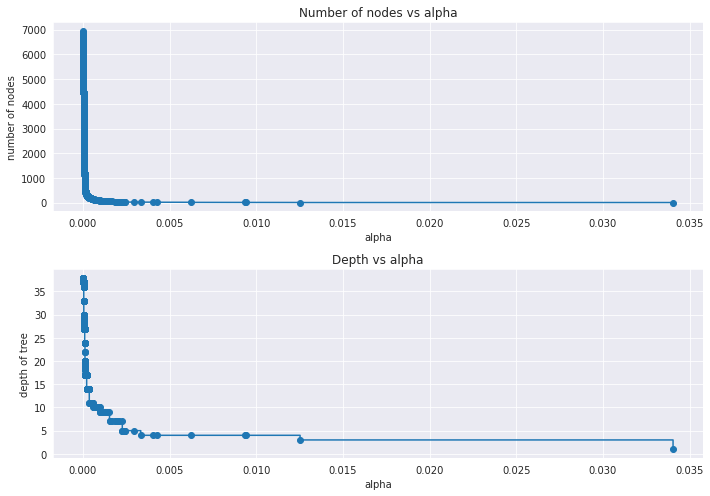

In [160]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [161]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(x_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

In [162]:
recall_test = []
for clf in clfs:
    pred_test = clf.predict(x_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

In [163]:
train_scores = [clf.score(x_train, y_train) for clf in clfs]
test_scores = [clf.score(x_test, y_test) for clf in clfs]

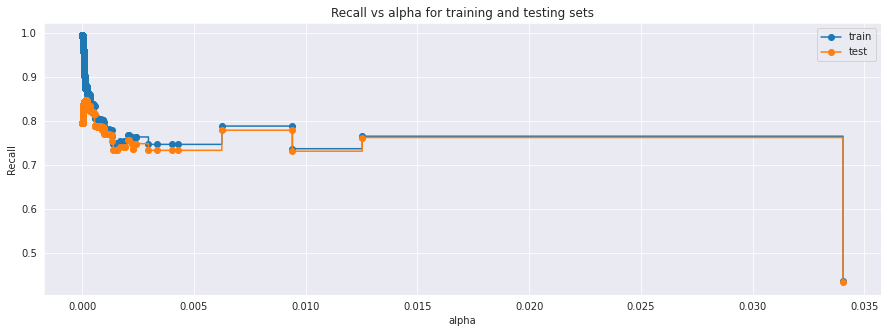

In [164]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(
    ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post",
)
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [165]:
# creating the model where we get highest train and test recall
index_dTree_post = np.argmax(recall_test)
dTree_post = clfs[index_dTree_post]
print(dTree_post)

DecisionTreeClassifier(ccp_alpha=0.00018533042799992287,
                       class_weight='balanced', random_state=1)


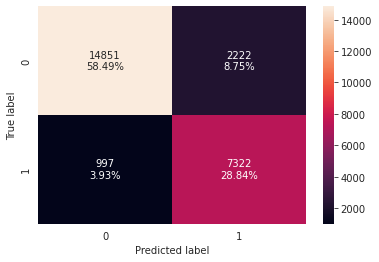

In [166]:
# confusion matrix for post-pruned model on training data
confusion_matrix_sklearn(dTree_post, x_train, y_train)

In [167]:
# performance metrics of post-pruned model on training data
dTree_post_train = model_performance_classification_sklearn(
    dTree_post, x_train, y_train
)
dTree_post_train

,Accuracy,Recall,Precision,F1
0,0.87323,0.88015,0.76718,0.81980


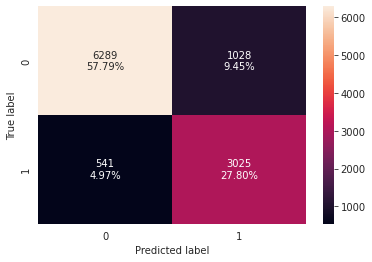

In [168]:
# confusion matrix of post-pruned model on test data
confusion_matrix_sklearn(dTree_post, x_test, y_test)

In [169]:
dTree_post_test= model_performance_classification_sklearn(
    dTree_post, x_test, y_test
)
dTree_post_test

,Accuracy,Recall,Precision,F1
0,0.85583,0.84829,0.74636,0.79407


* In the post-pruned tree also, the model is giving a generalized result since the recall scores on both the train and test data are closer at 0.88 and 0.84 which shows that the model is able to generalize well on unseen data.

Let's take a look at the post-pruned tree

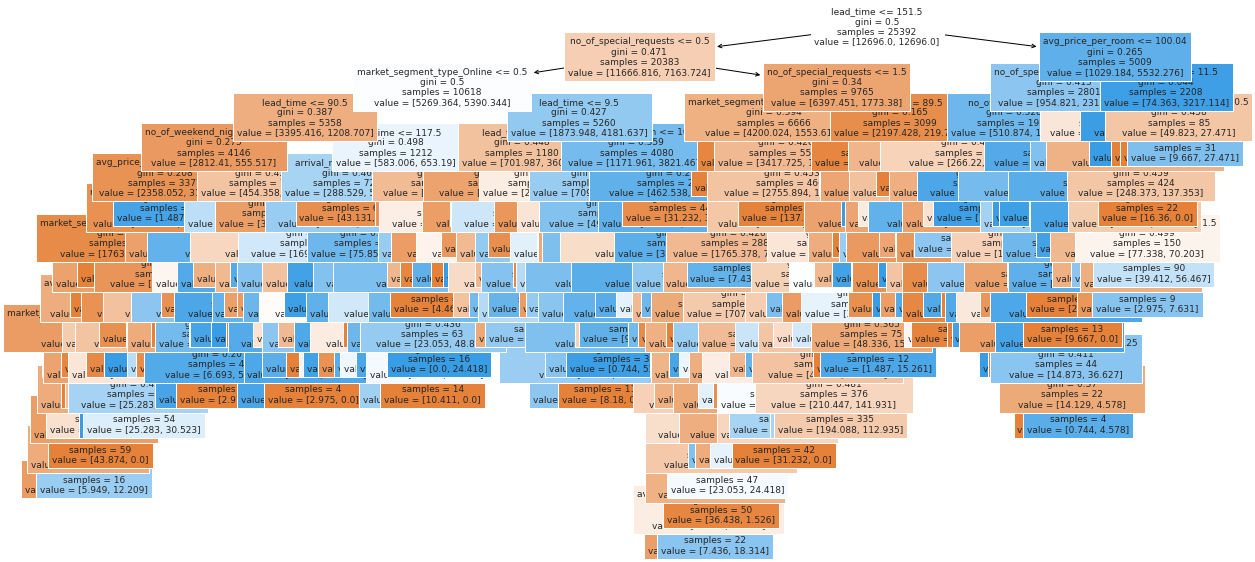

In [170]:
plt.figure(figsize=(20, 10))

out = tree.plot_tree(
    dTree_post,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

The post-pruned model if very complex and actually has a slightly lower recall than the pre-pruned model.

In [171]:
print(feature_names)

['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Meal Plan 3', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 3', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Complementary', 'market_segment_type_Corporate', 'market_segment_type_Offline', 'market_segment_type_Online']


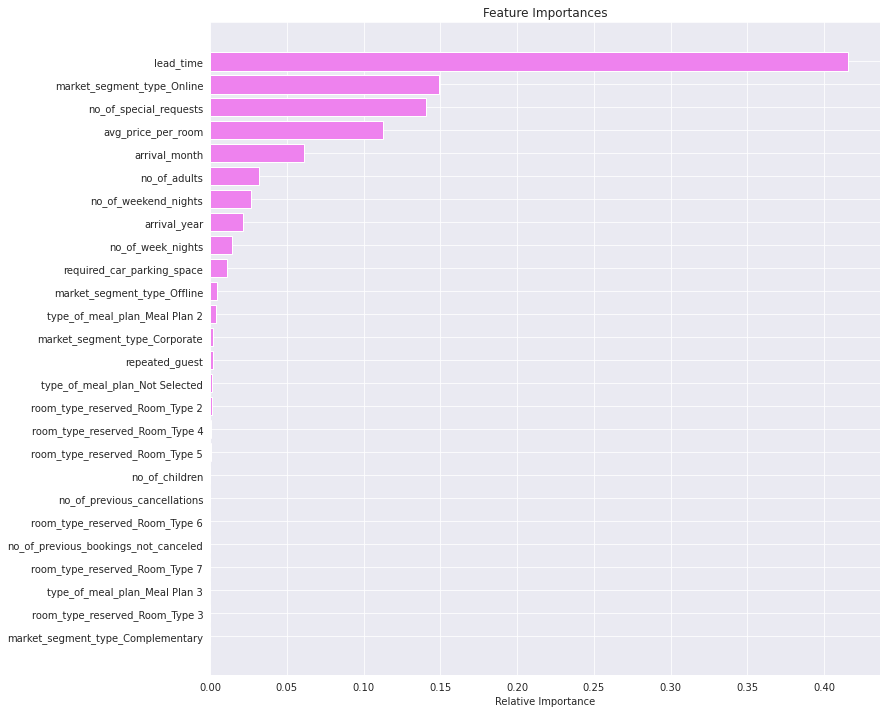

In [172]:
# visualize feature importances
importances = dTree_post.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])

plt.xlabel('Relative Importance')
plt.show()

The post-pruned model utilizes many more features, but lead time is still by far the most important.

In [173]:
# Text report showing the rules of a decision tree -

print(tree.export_text(dTree_post, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 1.50
|   |   |   |   |   |--- avg_price_per_room <= 202.00
|   |   |   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |   |--- repeated_guest <= 0.50
|   |   |   |   |   |   |   |   |   |--- avg_price_per_room <= 87.25
|   |   |   |   |   |   |   |   |   |   |--- market_segment_type_Corporate <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [54.29, 0.00] class: 0
|   |   |   |   |   |   |   |   |   |   |--- market_segment_type_Corporate >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |--- avg_price_per_room >  87.25
|   |   |   |   |   |   |   |   |   |   |--- lead_time <= 1.50
|   |   |   |   |   |   |   |   |  

## Model Performance Comparison and Conclusions

In [174]:
# training data performance comparison

models_train_comp_df = pd.concat(
    [
        dTree_init_train.T,
        dTree_wt_train.T,
        dTree_pre_train.T,
        dTree_post_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree without class_weight",
    "Decision Tree with class_weight",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree without class_weight,Decision Tree with class_weight,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.99374,0.99283,0.62067,0.87323
Recall,0.98413,0.99399,0.86032,0.88015
Precision,0.99671,0.98429,0.45799,0.76718
F1,0.99038,0.98911,0.59776,0.81980


In [175]:
# testing data performance comparison

models_test_comp_df = pd.concat(
    [
        dTree_init_test.T,
        dTree_wt_test.T,
        dTree_pre_test.T,
        dTree_post_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree without class_weight",
    "Decision Tree with class_weight",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree without class_weight,Decision Tree with class_weight,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.86511,0.86428,0.61343,0.85583
Recall,0.79697,0.79417,0.85334,0.84829
Precision,0.79253,0.79217,0.45236,0.74636
F1,0.79474,0.79317,0.59128,0.79407


### Which Performance Metrics Matter the Most?


The comparison of performance metrics illustrates the importance of choosing the correct metric for the specific business problem we are trying to solve. 

In some scenerios you would want to focus on Precision (out of all the predicted positives, how many were actually positive).

In other scenerios, you would focus on Recall (out of all the actual positives, how many did your model predict).

Still other scenerios call for a balance of the two, and that is where F1 score is important.

The question one must ask when choosing a performance metric, is a matter of cost...
- Which is more costly; Mis-predicting a positive as a negative, or mis-predicting a negative as a positive. 

For this scenerio, we should choose **Recall** as the metric we want to see with a high score.  This is because the cost of missing a positive is higher than the cost of predicting a true negative as a positive.  We want to favor correctly predicting the guests who will cancel, and are less concerned with predicting someone will cancel when they actually do not.

The justification for this thought process is as such:
- Canceled reservations that cannot be re-sold are costly as there is both a refund issued, and the blocking of an available room that could have been booked by someone else.

- If we predict a guest as canceling, but they in fact do NOT cancel, there is no real cost to the Hotel. Additionally, since we are focusing on framing cancelation policy wrt lead time and refund, we are not actually denying the 'False Positive' guest service. Instead, we are just imposing a restriction that will not affect them anyway.  





### Logistic Regression vs Decision Tree


The Logistic Regression model underperformed compared to the Decision Tree.  
The recall score was much lower for the LogReg model had Recall and Precision of 66%.

There were some interesting odds insights, however, that could be considered.  I recommend using one of the Decision Trees, however. 

For example: Room Types 5,6,7 all had a 56%, 62%, 81% reduction in cancelation odds.  

Additionally, repeat customers are 93% less likely to cancel, so consideration could be given to repeat customers regarding cancellation policy.

### Decision Tree Comparison


The **Pre-Pruned** model and the **Post-Pruned** model both have similar recall values.  The **Pre-Pruned** model is much much simpler, but has a lower precision, accuracy, and F1 score. 

For this scenerio, since FPs may not carry much cost, I recommend using the simpler **Pre-Pruned** model for two reasons.  
  - Being simpler, it is easier to interpret and has a much faster run time.
    - This is important for online and offline bookings, if we are using the model to determine, in real time, which cancelleation/refund policy to apply.
  - Additionally, we actually have a slightly better recall with this model and will be able to predict more cancelations and thus apply policy to the guests with a higher risk of cancelation.
    - *It should be noted, that there will be high FPs with this model, and further monitoring is required to see if application of cancelation policies reduce the quantity of bookings. 

If greater precision proves to be important, we could use the **Post-Pruned** model.  We will still identify almost as many TP (cancelers) but will have fewer FP.  The trade-off is that this is a complex model with a longer run time which could be detrimental to online bookings where potential guests may not want to wait for a cancelation policy decision to be made. 

## Actionable Insights and Recommendations

- What profitable policies for cancellations and refunds can the hotel adopt?
- What other recommedations would you suggest to the hotel?

Due to the simplicity and fast runtime, I recommend using the pre-pruned model to predict potential cancellations.  
  - Lead time is the feature with the most impact.
    - if Lead Time is greater than 151.5 days, there should be a cancellation policy, these are more likely to be cancelled.

  -Additionally, for shorter lead times, the number of special requests influences the cancelation liklihood.
    - Guests with increased special requirements are LESS likly to cancel.

We have also seen, from the LogRes model, that room types 5, 6, and have a far less chance of being cancelled.  Consideration could be given to a more lenient cancelation policy for these room types. 

Also, repeat customers are 93% less likely to cancel so we could be more lenient with these customers to encourage their repeat business.

Bottom Line, the hotel needs to have a cancellation policy that discourges cancellations, or refuses refunds, if the room is cancelled.

We could just hard code the key factors mentioned above to select a cancelation policy, but we would have greater accuracy if running a Decision Tree on each booking.  The pre-pruned model is much simpler and better to use in this scenerio.  This model will predict 85% of the cancellations.